<a href="https://colab.research.google.com/github/moaztayea/Credit-Card-Defaulters/blob/main/BINARY_CLASSIFICATION_DEFAULTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from xgboost import XGBClassifier
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.utils import shuffle
from yellowbrick.classifier import ROCAUC
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
!pip install --upgrade --force-reinstall xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 3.4 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


# Read Datase

In [ ]:
# read train dataset
default_df = pd.read_csv("/content/drive/MyDrive/Credit- Card-Default/UCI_Credit_Card.csv")

In [ ]:
# show random 10 sample of our dataset
default_df.sample(10)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
15804  15805   90000.00    2          2         2   24      0      0      0   
28429  28430  140000.00    2          2         1   33      1     -1      0   
29049  29050  500000.00    2          3         1   54     -2     -2     -2   
14089  14090  190000.00    1          3         1   38      0      0      0   
9175    9176  240000.00    1          2         2   30      0      0      0   
995      996  200000.00    1          1         2   39     -2     -2     -2   
17825  17826   50000.00    1          2         2   25     -2     -2     -2   
926      927   20000.00    1          2         1   46      0      0      0   
4275    4276  270000.00    1          2         1   34      2      0      0   
22406  22407  160000.00    2          2         2   29      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
15804      0  ...   33434.00       0.00       0.00   3248.00   2991.00   
28429      0  ...    8577.00    9452.00   11153.00   7933.00   2000.00   
29049     -2  ...       0.00       0.00       0.00      0.00      0.00   
14089      0  ...  102131.00  104491.00  106755.00   4000.00   4000.00   
9175       0  ...  148681.00   24105.00    9770.00  10000.00  10000.00   
995       -2  ...       0.00   60800.00       0.00      0.00      0.00   
17825     -2  ...   -2587.00   -2587.00   -2587.00      0.00      0.00   
926        0  ...    8153.00    8324.00    8490.00   1122.00   1500.00   
4275       0  ...  150298.00  134808.00  129645.00  10332.00  10000.00   
22406      0  ...   34873.00   35677.00   34942.00   4002.00   5390.00   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
15804   2655.00      0.00      0.00      0.00                           0  
28429   2000.00   1000.00   2000.00   1000.00                           0  
29049      0.00      0.00      0.00      0.00                           1  
14089   4000.00   4000.00   4000.00   4000.00                           0  
9175     300.00   1000.00   9770.00  18037.00                           0  
995      200.00  60800.00      0.00      0.00                           0  
17825      0.00      0.00      0.00      0.00                           1  
926      291.00    302.00    304.00    319.00                           0  
4275   18021.00   8026.00   6011.00   5000.00                           1  
22406   6000.00   5000.00   5000.00   4000.00                           0  

[10 rows x 25 columns]

# Exploring

In [ ]:
default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

# Rename columns

In [ ]:
default_df['Defaulter'] =default_df ['default.payment.next.month']
default_df=default_df.drop('default.payment.next.month',axis = 1)

In [ ]:
#renaming columns 
default_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
default_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
default_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

## Check Data Imbalanced Or Not .. ?

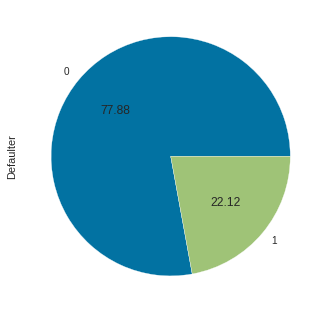

In [ ]:
# check imbalance of data
default_df.Defaulter.value_counts().plot.pie(autopct='%.2f')

## Handling Object Columns

**SEX**



*   1 = Male
*   2 = Female

In [ ]:
default_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

**Education**

* 1 = Graduate School
* 2 = University 
* 3 = High School
* 4 = Others

In [ ]:
default_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [ ]:
default_df["EDUCATION"]=default_df["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

In [ ]:
default_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

**Marriage**
* 1 = Married
* 2 = Single
* 3 = Others

In [ ]:
default_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

We have few values for 0, which are not determined . So I am adding them in Others category.

In [ ]:
default_df["MARRIAGE"]=default_df["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [ ]:
default_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

### category

In [ ]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [ ]:
df_cat = default_df[categorical_features]
df_cat['Defaulter'] = default_df['Defaulter']

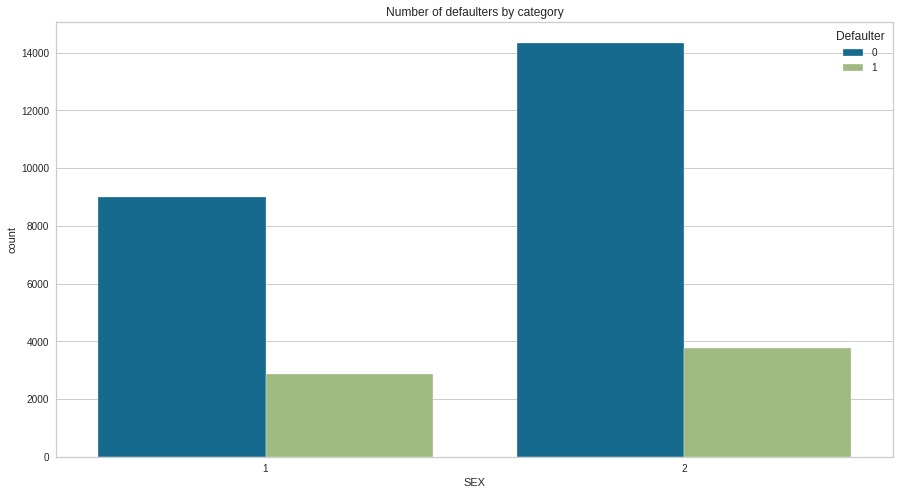

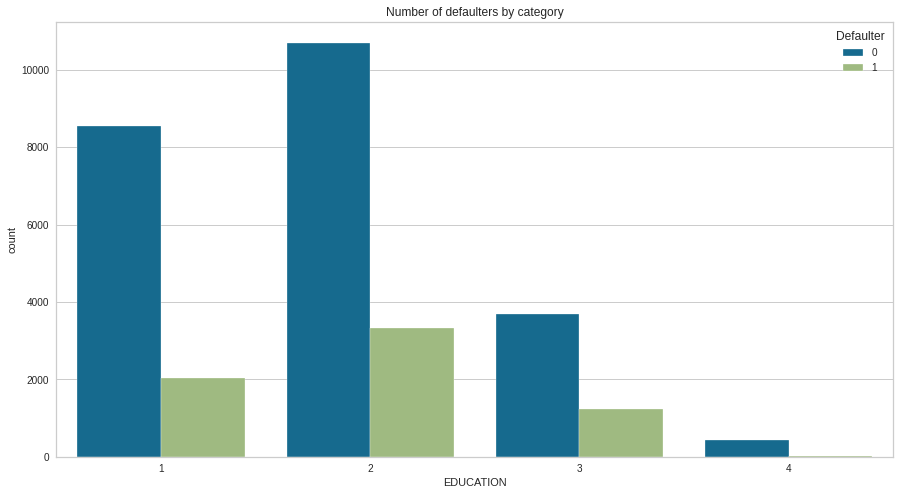

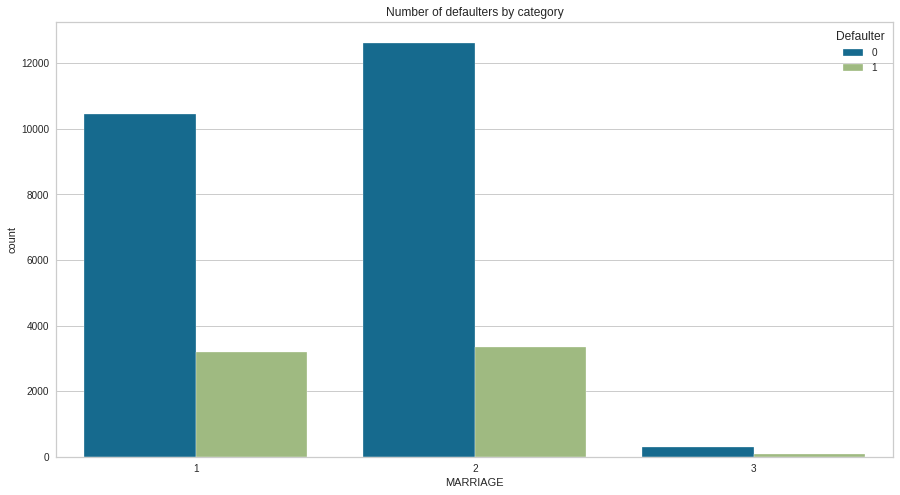

In [ ]:
for col in categorical_features:
  plt.figure(figsize=(15,8))
  plt.title('Number of defaulters by category')
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

Below are few observations for categorical features:




*   There are more females credit card holder,so no. of defaulter have high proportion of females.
*   No. of defaulters have a higher proportion of educated people  (graduate school and university)
*  No. of defaulters have a higher proportion of Singles.






**Limit Balance**

In [ ]:
default_df['LIMIT_BAL'].describe()

count     30000.00
mean     167484.32
std      129747.66
min       10000.00
25%       50000.00
50%      140000.00
75%      240000.00
max     1000000.00
Name: LIMIT_BAL, dtype: float64

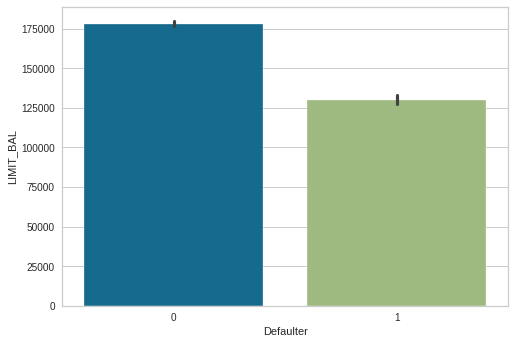

In [ ]:
sns.barplot(x='Defaulter', y='LIMIT_BAL', data=default_df)

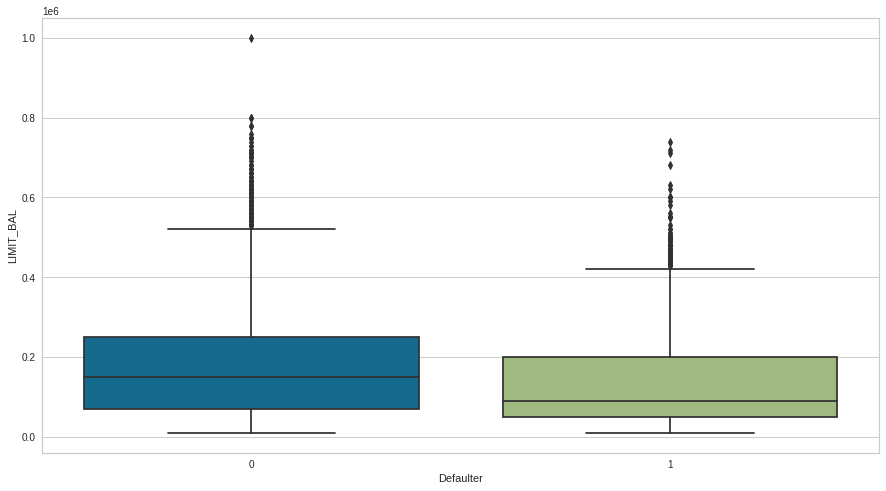

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Defaulter", y="LIMIT_BAL", data=default_df)

### Age

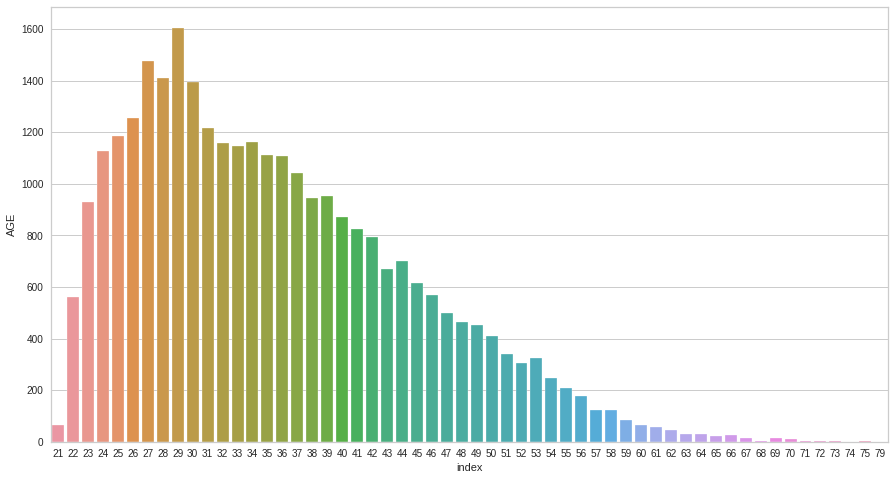

In [ ]:
fig=plt.figure(figsize=(15,8))
age_df=default_df['AGE'].value_counts().reset_index()
sns.barplot(x='index',y='AGE',data=age_df)

In [ ]:
default_df.groupby('Defaulter')['AGE'].mean()

Defaulter
0   35.42
1   35.73
Name: AGE, dtype: float64

**Bill Amount**

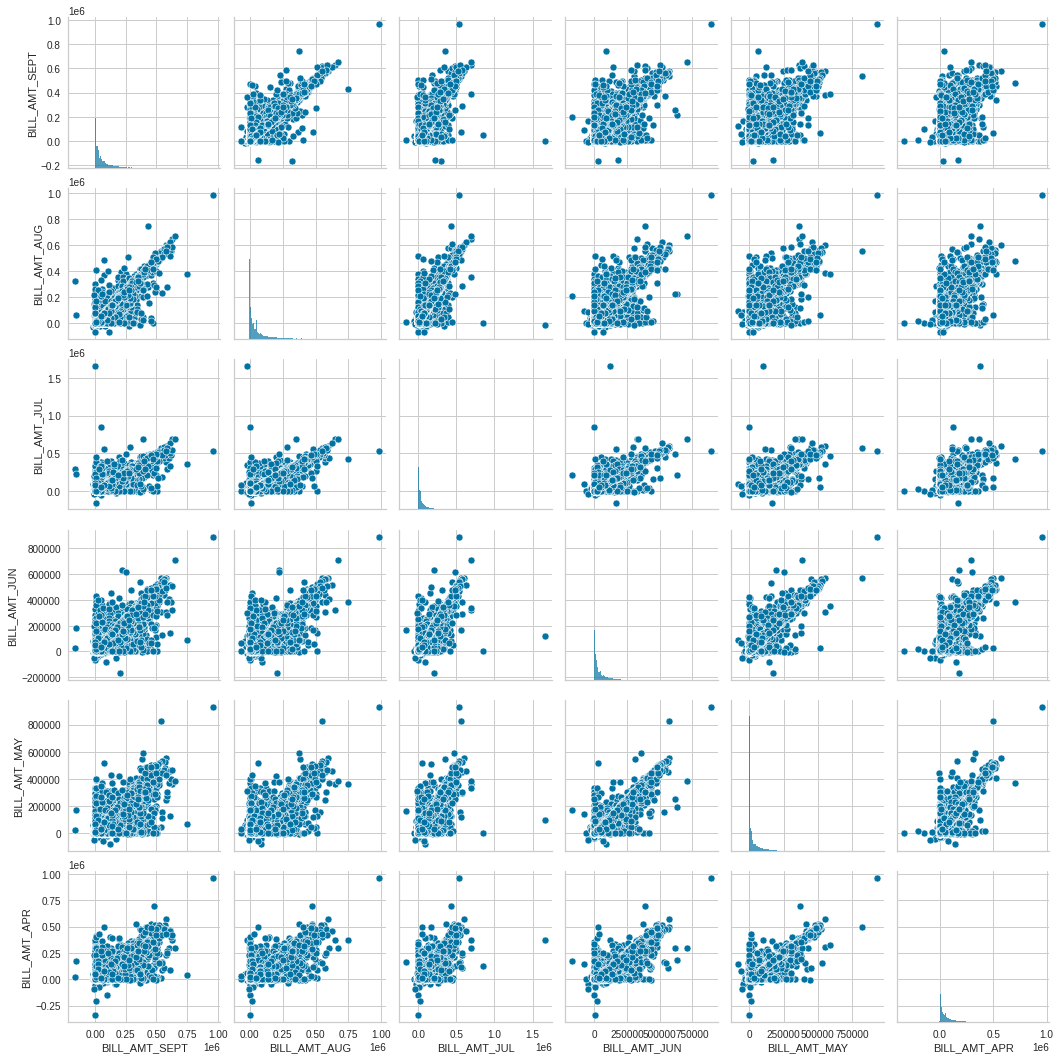

In [ ]:
sns.pairplot(data = default_df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']])

**History payment status**

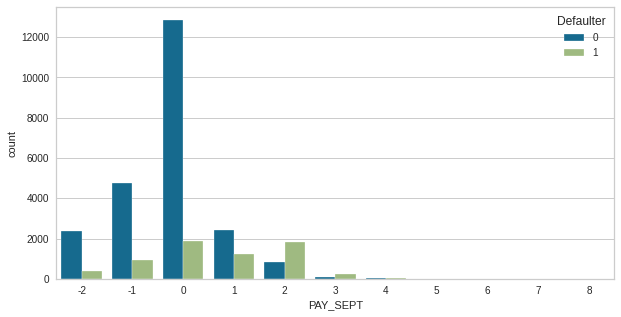

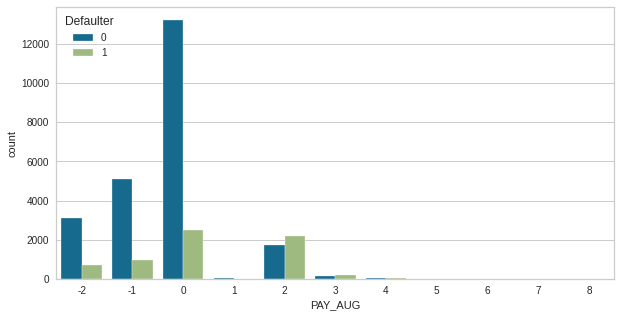

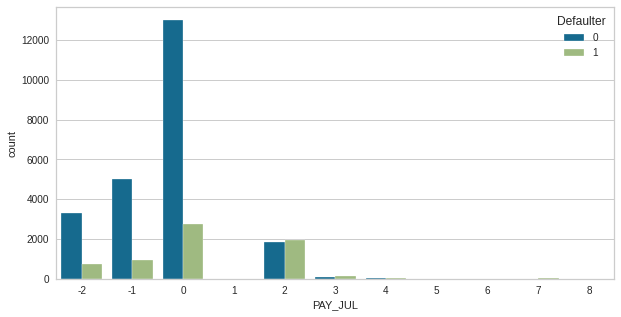

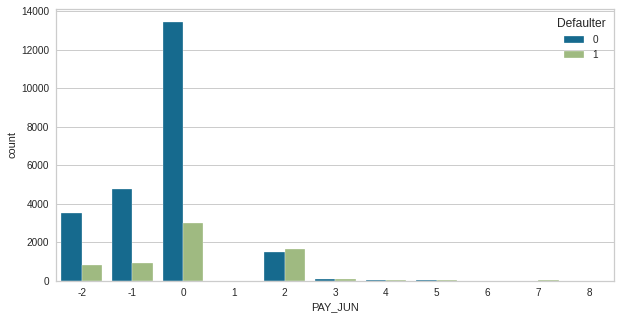

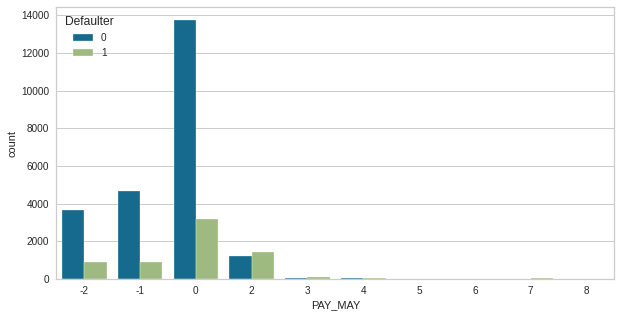

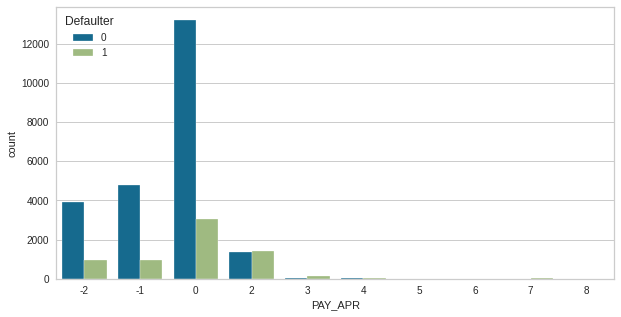

In [ ]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
    plt.figure(figsize=(10,5))
    sns.countplot(x = col, hue = 'Defaulter', data = default_df)

**Paid Amount**

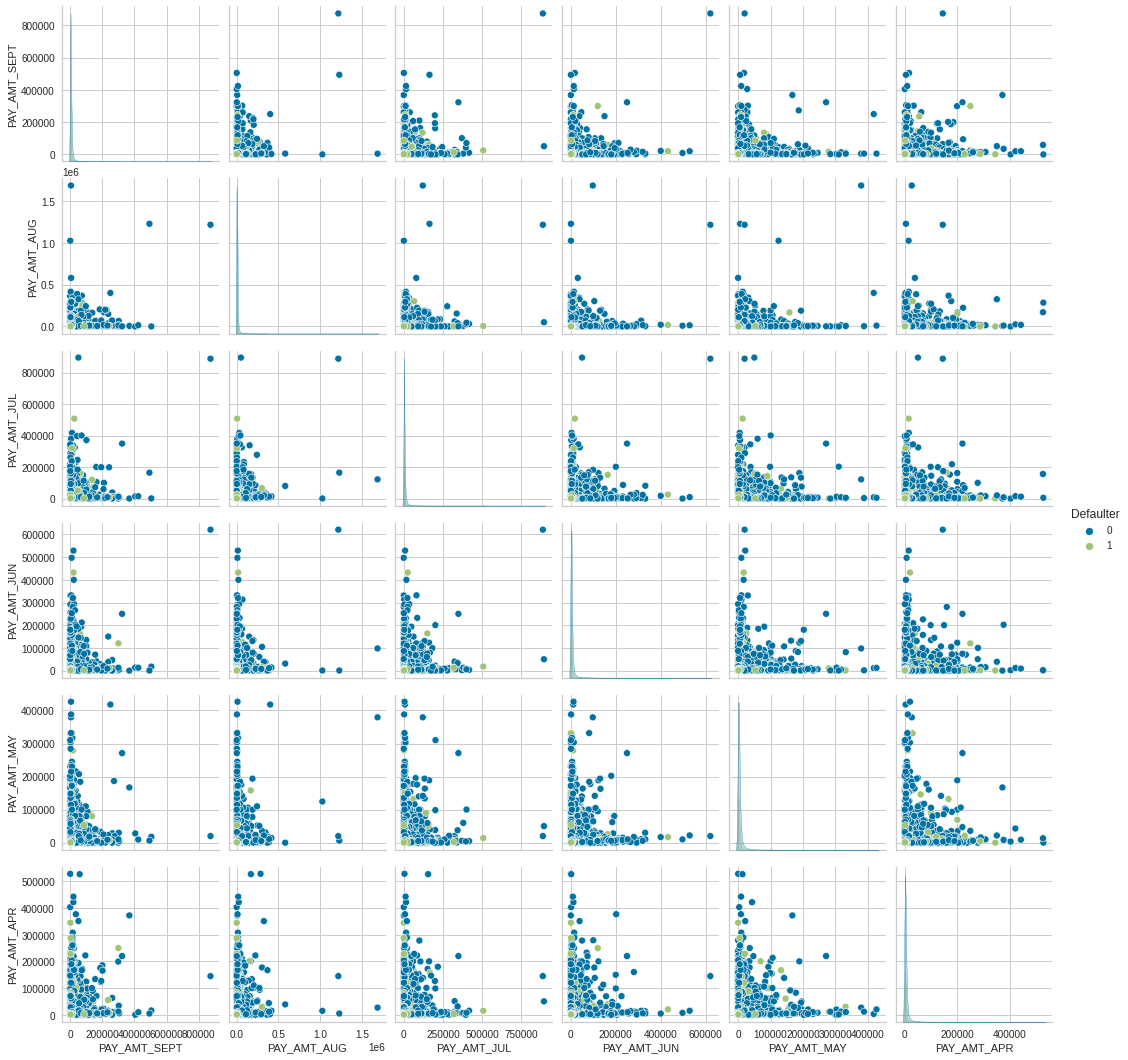

In [ ]:
pay_amnt = default_df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'Defaulter']]
sns.pairplot(data = pay_amnt, hue='Defaulter')

# Feature Engineering


In [ ]:
fe_df = default_df.copy()

In [ ]:
fe_df['Payement_Value'] = fe_df['PAY_SEPT'] + fe_df['PAY_AUG'] + fe_df['PAY_JUL'] + fe_df['PAY_JUN'] + fe_df['PAY_MAY'] + fe_df['PAY_APR']

In [ ]:
fe_df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0   1   20000.00    2          2         1   24         2        2       -1   
1   2  120000.00    2          2         2   26        -1        2        0   
2   3   90000.00    2          2         2   34         0        0        0   
3   4   50000.00    2          2         1   37         0        0        0   
4   5   50000.00    1          2         1   57        -1        0       -1   

   PAY_JUN  ...  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  \
0       -1  ...          0.00          0.00          0.00       689.00   
1        0  ...       3455.00       3261.00          0.00      1000.00   
2        0  ...      14948.00      15549.00       1518.00      1500.00   
3        0  ...      28959.00      29547.00       2000.00      2019.00   
4        0  ...      19146.00      19131.00       2000.00     36681.00   

   PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  Defaulter  \
0         0.00         0.00         0.00         0.00          1   
1      1000.00      1000.00         0.00      2000.00          1   
2      1000.00      1000.00      1000.00      5000.00          0   
3      1200.00      1100.00      1069.00      1000.00          0   
4     10000.00      9000.00       689.00       679.00          0   

   Payement_Value  
0              -2  
1               3  
2               0  
3               0  
4              -2  

[5 rows x 26 columns]

In [ ]:
fe_df.groupby('Defaulter')['Payement_Value'].mean()

Defaulter
0   -1.98
1    2.02
Name: Payement_Value, dtype: float64

In [ ]:
fe_df['Dues'] = (fe_df['BILL_AMT_APR']+fe_df['BILL_AMT_MAY']+fe_df['BILL_AMT_JUN']+fe_df['BILL_AMT_JUL']+fe_df['BILL_AMT_SEPT'])-(fe_df['PAY_AMT_APR']+fe_df['PAY_AMT_MAY']+fe_df['PAY_AMT_JUN']+fe_df['PAY_AMT_JUL']+fe_df['PAY_AMT_AUG']+fe_df['PAY_AMT_SEPT'])

In [ ]:
fe_df.groupby('Defaulter')['Dues'].mean()

Defaulter
0   187742.05
1   193570.04
Name: Dues, dtype: float64

In [ ]:
fe_df['EDUCATION'].unique()

array([2, 1, 3, 4])

In [ ]:
fe_df['EDUCATION']=np.where(fe_df['EDUCATION'] == 6, 4, fe_df['EDUCATION'])
fe_df['EDUCATION']=np.where(fe_df['EDUCATION'] == 0, 4, fe_df['EDUCATION'])

In [ ]:
fe_df['MARRIAGE'].unique()

array([1, 2, 3])

In [ ]:
fe_df['MARRIAGE']=np.where(fe_df['MARRIAGE'] == 0, 3, fe_df['MARRIAGE'])

In [ ]:
fe_df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0   1   20000.00    2          2         1   24         2        2       -1   
1   2  120000.00    2          2         2   26        -1        2        0   
2   3   90000.00    2          2         2   34         0        0        0   
3   4   50000.00    2          2         1   37         0        0        0   
4   5   50000.00    1          2         1   57        -1        0       -1   

   PAY_JUN  ...  BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  \
0       -1  ...          0.00          0.00       689.00         0.00   
1        0  ...       3261.00          0.00      1000.00      1000.00   
2        0  ...      15549.00       1518.00      1500.00      1000.00   
3        0  ...      29547.00       2000.00      2019.00      1200.00   
4        0  ...      19131.00       2000.00     36681.00     10000.00   

   PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  Defaulter  Payement_Value      Dues  
0         0.00         0.00         0.00          1              -2   3913.00  
1      1000.00         0.00      2000.00          1               3  10352.00  
2      1000.00      1000.00      5000.00          0               0  76608.00  
3      1100.00      1069.00      1000.00          0               0 174713.00  
4      9000.00       689.00       679.00          0              -2  44620.00  

[5 rows x 27 columns]

In [ ]:

fe_df.drop(['ID'],axis = 1, inplace = True)

In [ ]:
fe_df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0   20000.00    2          2         1   24         2        2       -1   
1  120000.00    2          2         2   26        -1        2        0   
2   90000.00    2          2         2   34         0        0        0   
3   50000.00    2          2         1   37         0        0        0   
4   50000.00    1          2         1   57        -1        0       -1   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  \
0       -1       -2  ...          0.00          0.00       689.00   
1        0        0  ...       3261.00          0.00      1000.00   
2        0        0  ...      15549.00       1518.00      1500.00   
3        0        0  ...      29547.00       2000.00      2019.00   
4        0        0  ...      19131.00       2000.00     36681.00   

   PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  Defaulter  \
0         0.00         0.00         0.00         0.00          1   
1      1000.00      1000.00         0.00      2000.00          1   
2      1000.00      1000.00      1000.00      5000.00          0   
3      1200.00      1100.00      1069.00      1000.00          0   
4     10000.00      9000.00       689.00       679.00          0   

   Payement_Value      Dues  
0              -2   3913.00  
1               3  10352.00  
2               0  76608.00  
3               0 174713.00  
4              -2  44620.00  

[5 rows x 26 columns]

In [ ]:
fe_df.groupby('Defaulter')['SEX'].value_counts()

Defaulter  SEX
0          2      14349
           1       9015
1          2       3763
           1       2873
Name: SEX, dtype: int64

# Splitting target from features

In [ ]:
# X=fe_df.drop('Defaulter',axis = 1)
# y=fe_df['Defaulter']

In [ ]:

X=default_df.drop('Defaulter',axis = 1)
y=default_df['Defaulter']

In [ ]:
np.unique(y,return_counts=True)

(array([0, 1]), array([23364,  6636]))

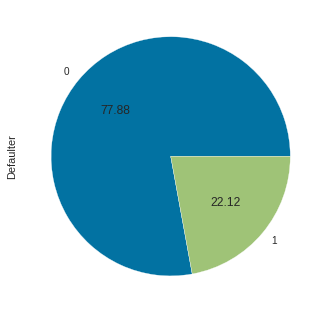

In [ ]:
y.value_counts().plot.pie(autopct='%.2f')

# Confusion Matrix and classification report

In [ ]:
# Print Confusion Matrix and classification report
def eva(y_test,algo_y_pred):
  metrics.ConfusionMatrixDisplay.from_predictions(y_test, algo_y_pred)
  print(metrics.classification_report(y_test, algo_y_pred))
  plt.show()

# train_test_split

In [ ]:
# Splitting data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

# Scaling with RobustScaler

In [ ]:
# use Robust Scaler to reduce the effect of outliers in our dataset
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test) 

In [ ]:
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models, predictions = clf.fit(X_train_robust, X_test_robust, y_train, y_test)
# models

# ROC


In [ ]:
# Function To Plot roc_auc curve
def plot_roc_auc_curve(pred, title):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=title)
    display.plot()
    plt.show()

# SMOTE

In [ ]:
# initialize smote variable
smote = SMOTE(random_state=42)
smote_x_train, smote_y_train = smote.fit_resample(X_train_robust, y_train)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(smote_x_train, X_test_robust, smote_y_train, y_test)
models

 38%|███▊      | 11/29 [01:13<01:23,  4.63s/it]

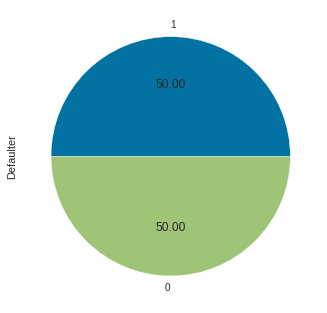

In [ ]:
smote_y_train.value_counts().plot.pie(autopct='%.2f')

## Logistic SMOTE

              precision    recall  f1-score   support

           0       0.87      0.68      0.76      5841
           1       0.36      0.65      0.46      1659

    accuracy                           0.67      7500
   macro avg       0.62      0.66      0.61      7500
weighted avg       0.76      0.67      0.70      7500



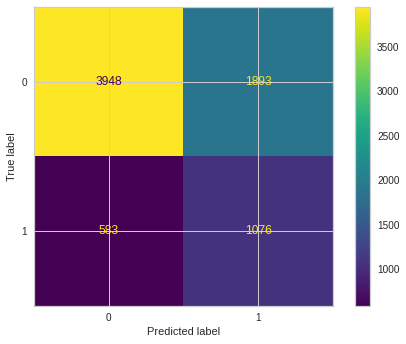

In [ ]:
log_classifier_smote = LogisticRegression()
log_classifier_smote.fit(smote_x_train, smote_y_train)
log_smote_y_pred = log_classifier_smote.predict(X_test_robust)
eva(y_test,log_smote_y_pred)

In [ ]:
log_f1_score = f1_score(y_test,log_smote_y_pred,average='macro')
log_f1_score

0.6131380243531801

In [ ]:
# get roc_auc score
log_smote_roc_auc_score = metrics.roc_auc_score(y_test, log_smote_y_pred)
print("LogisticRegression Classifier Roc_AUC Score Is {}".format(log_smote_roc_auc_score))

LogisticRegression Classifier Roc_AUC Score Is 0.6622475714945142


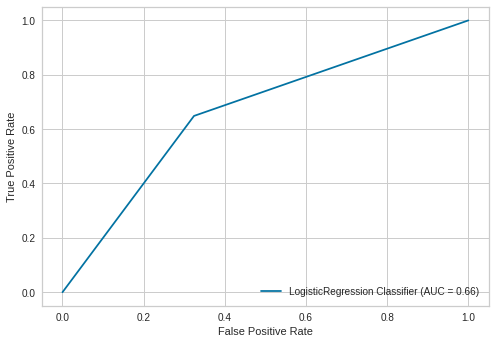

In [ ]:
plot_roc_auc_curve(log_smote_y_pred, "LogisticRegression Classifier")

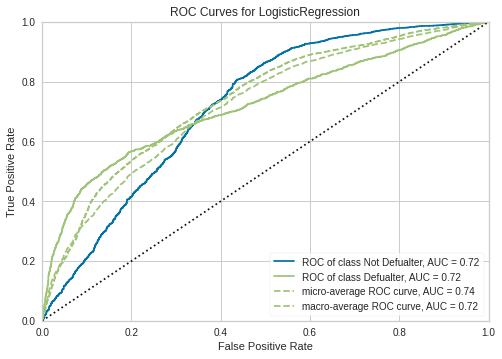

In [ ]:
visualizer = ROCAUC(log_classifier_smote, classes=["Not Defualter", "Defualter"])

visualizer.fit(smote_x_train, smote_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## SVC SMOTE

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      5841
           1       0.49      0.56      0.52      1659

    accuracy                           0.77      7500
   macro avg       0.68      0.70      0.69      7500
weighted avg       0.79      0.77      0.78      7500



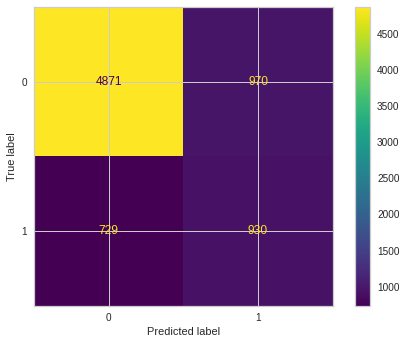

In [ ]:
svc_classifier_smote = SVC()
svc_classifier_smote.fit(smote_x_train, smote_y_train)
svc_smote_y_pred = svc_classifier_smote.predict(X_test_robust)
eva(y_test,svc_smote_y_pred)

In [ ]:
svc_f1_score=f1_score(svc_smote_y_pred,y_test,average='macro')
svc_f1_score

0.6870588539823858

In [ ]:
# get roc_auc score
svc_smote_roc_auc_score = metrics.roc_auc_score(y_test, svc_smote_y_pred)
print("SVC Classifier Roc_AUC Score Is {}".format(svc_smote_roc_auc_score))

SVC Classifier Roc_AUC Score Is 0.6972556038207187


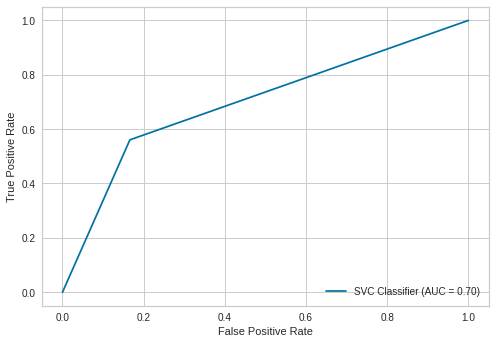

In [ ]:
plot_roc_auc_curve(svc_smote_y_pred, "SVC Classifier")

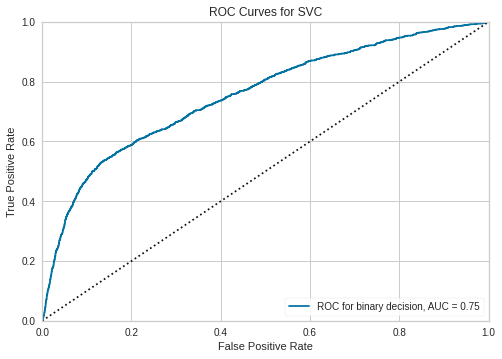

In [ ]:
visualizer = ROCAUC(svc_classifier_smote, classes=["Not Defualter", "Defualter"],binary=True)

visualizer.fit(smote_x_train, smote_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## Decision Tree SMOTE

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      5841
           1       0.36      0.44      0.40      1659

    accuracy                           0.70      7500
   macro avg       0.59      0.61      0.60      7500
weighted avg       0.73      0.70      0.71      7500



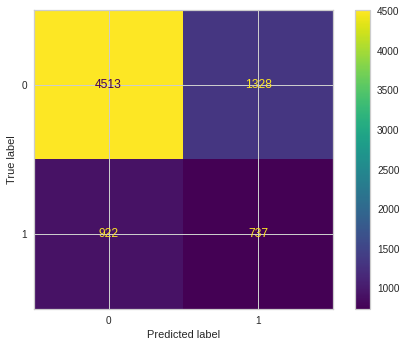

In [ ]:
dt_classifier_smote = DecisionTreeClassifier()
dt_classifier_smote.fit(smote_x_train, smote_y_train)
dt_smote_y_pred = dt_classifier_smote.predict(X_test_robust)
eva(y_test,dt_smote_y_pred)

In [ ]:
dt_f1_score=f1_score(y_test,dt_smote_y_pred,average='macro')
dt_f1_score

0.5981360561998926

In [ ]:
# get roc_auc score
dt_smote_roc_auc_score = metrics.roc_auc_score(y_test, dt_smote_y_pred)
print("Decision Tree Classifier Roc_AUC Score Is {}".format(dt_smote_roc_auc_score))

Decision Tree Classifier Roc_AUC Score Is 0.6084425955698215


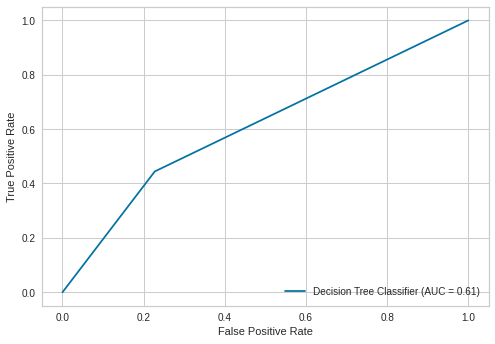

In [ ]:
plot_roc_auc_curve(dt_smote_y_pred, "Decision Tree Classifier")

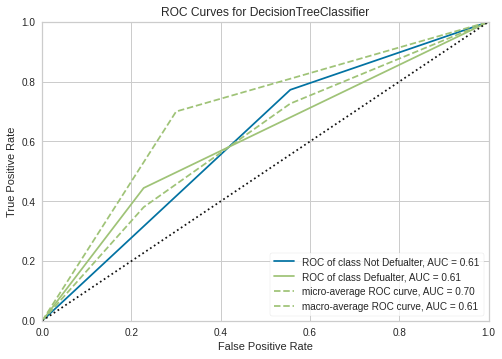

In [ ]:
visualizer = ROCAUC(dt_classifier_smote, classes=["Not Defualter", "Defualter"])

visualizer.fit(smote_x_train, smote_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## LGBMClassifier SMOTE 

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      5841
           1       0.61      0.43      0.50      1659

    accuracy                           0.81      7500
   macro avg       0.73      0.67      0.69      7500
weighted avg       0.80      0.81      0.80      7500



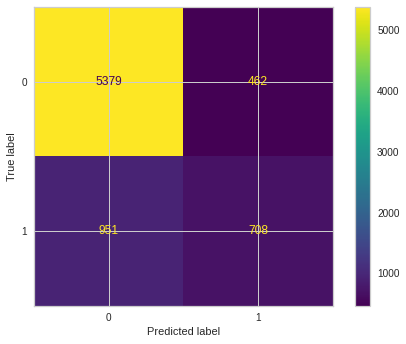

In [ ]:
# LGBMClassifier with scaled data
lgbm_classifier_smote = LGBMClassifier(random_state=42)
lgbm_classifier_smote.fit(smote_x_train, smote_y_train)
lgbm_y_pred = lgbm_classifier_smote.predict(X_test_robust)
eva(y_test,lgbm_y_pred)

In [ ]:
lgbm_f1_score=f1_score(y_test,lgbm_y_pred,average='macro')
lgbm_f1_score

0.6922172927616042

In [ ]:
# get roc_auc score
lgbm_smote_roc_auc_score = metrics.roc_auc_score(y_test, lgbm_y_pred)
print("LGBM Classifier Roc_AUC Score Is {}".format(lgbm_smote_roc_auc_score))

LGBM Classifier Roc_AUC Score Is 0.673833532554837


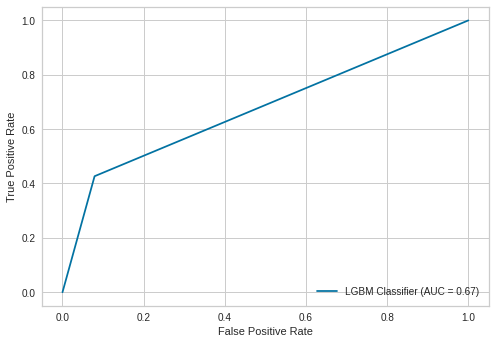

In [ ]:
plot_roc_auc_curve(lgbm_y_pred, "LGBM Classifier")

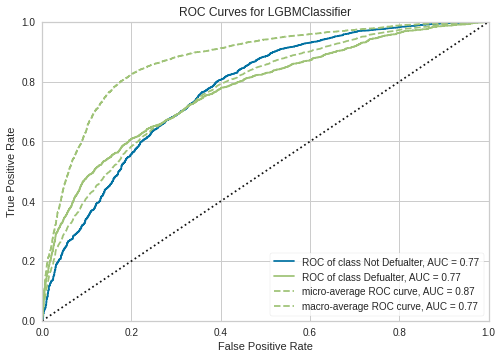

In [ ]:
visualizer = ROCAUC(lgbm_classifier_smote, classes=["Not Defualter", "Defualter"])

visualizer.fit(smote_x_train, smote_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## HistGradientBoostingClassifier SMOTE

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      5841
           1       0.58      0.46      0.51      1659

    accuracy                           0.81      7500
   macro avg       0.72      0.68      0.70      7500
weighted avg       0.79      0.81      0.80      7500



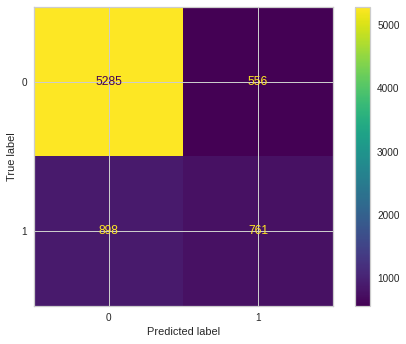

In [ ]:
# HistGradientBoostingClassifier with scaled data
hist_classifier_smote = HistGradientBoostingClassifier(random_state=42)
hist_classifier_smote.fit(smote_x_train, smote_y_train)
hist_smote_y_pred = hist_classifier_smote.predict(X_test_robust)
eva(y_test,hist_smote_y_pred)

In [ ]:
hist_f1_score=f1_score(y_test,hist_smote_y_pred,average='macro')
hist_f1_score

0.695249957075097

In [ ]:
# get roc_auc score
hist_smote_roc_auc_score = metrics.roc_auc_score(y_test, hist_smote_y_pred)
print("HistGradientBoosting Classifier Roc_AUC Score Is {}".format(hist_smote_roc_auc_score))

HistGradientBoosting Classifier Roc_AUC Score Is 0.6817604431850302


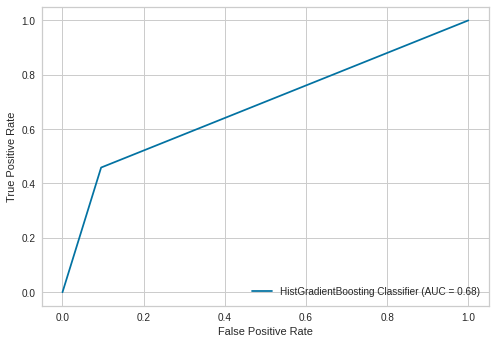

In [ ]:
plot_roc_auc_curve(hist_smote_y_pred, "HistGradientBoosting Classifier")

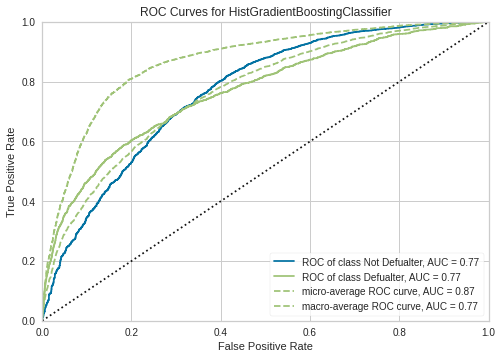

In [ ]:
visualizer = ROCAUC(hist_classifier_smote, classes=["Not Defualter", "Defualter"])

visualizer.fit(smote_x_train, smote_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## RANDOM FOREST SMOTE 

              precision    recall  f1-score   support

           0       0.86      0.90      0.87      5841
           1       0.56      0.47      0.51      1659

    accuracy                           0.80      7500
   macro avg       0.71      0.68      0.69      7500
weighted avg       0.79      0.80      0.79      7500



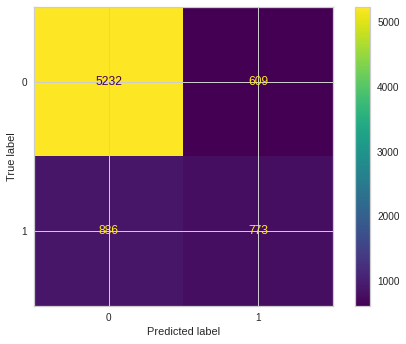

In [ ]:
# RandomForestClassifier with scaling data and with oversampling using SMOTE
rfc_classifier_smote=RandomForestClassifier(random_state=42)
rfc_classifier_smote.fit(smote_x_train, smote_y_train)
rfc_smote_y_pred = rfc_classifier_smote.predict(X_test_robust)
eva(y_test,rfc_smote_y_pred)

In [ ]:
rfc_f1_score=f1_score(y_test,rfc_smote_y_pred,average='macro')
rfc_f1_score

0.6916874735803319

In [ ]:
# get roc_auc score
rfc_smote_roc_auc_score = metrics.roc_auc_score(y_test, rfc_smote_y_pred)
print("RANDOM FOREST Classifier Roc_AUC Score Is {}".format(rfc_smote_roc_auc_score))

RANDOM FOREST Classifier Roc_AUC Score Is 0.6808401853456562


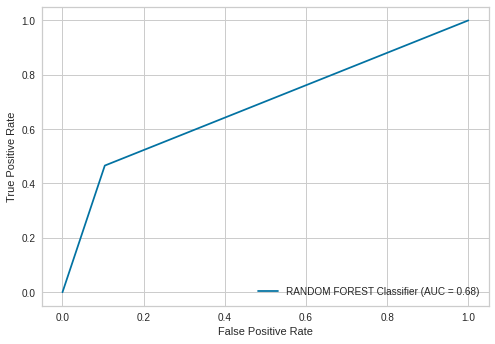

In [ ]:
plot_roc_auc_curve(rfc_smote_y_pred, "RANDOM FOREST Classifier")

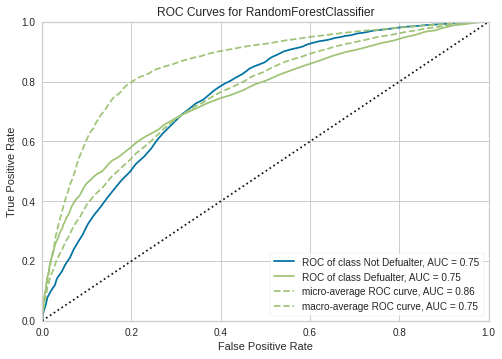

In [ ]:
visualizer = ROCAUC(rfc_classifier_smote, classes=["Not Defualter", "Defualter"])

visualizer.fit(smote_x_train, smote_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## XGBClassifier SMOTE

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      5841
           1       0.56      0.49      0.52      1659

    accuracy                           0.80      7500
   macro avg       0.71      0.69      0.70      7500
weighted avg       0.79      0.80      0.80      7500



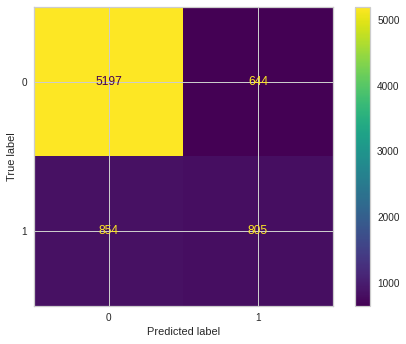

In [ ]:
# XGBClassifier with scaled data and with oversampling using SMOTE
xgb_clf_smote = XGBClassifier(random_state=42)
xgb_clf_smote.fit(smote_x_train, smote_y_train)
xgb_smote_y_pred = xgb_clf_smote.predict(X_test_robust)
eva(y_test,xgb_smote_y_pred)

In [ ]:
xgb_f1_score=f1_score(y_test,xgb_smote_y_pred,average='macro')
xgb_f1_score

0.6960254906773574

In [ ]:
# get roc_auc score
xgb_smote_roc_auc_score = metrics.roc_auc_score(y_test, xgb_smote_y_pred)
print("XGB Classifier Roc_AUC Score Is {}".format(xgb_smote_roc_auc_score))

XGB Classifier Roc_AUC Score Is 0.691156825248222


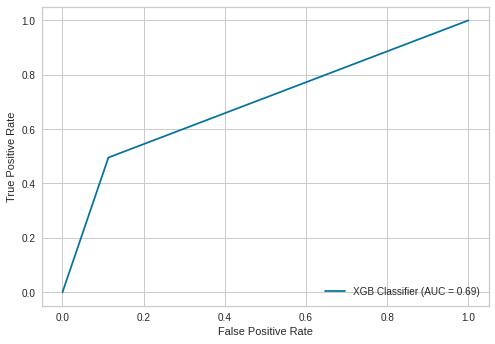

In [ ]:
plot_roc_auc_curve(xgb_smote_y_pred, "XGB Classifier")

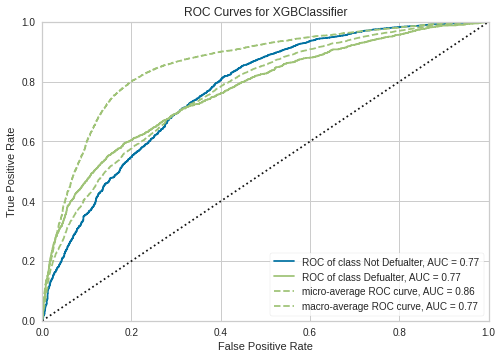

In [ ]:
visualizer = ROCAUC(xgb_clf_smote, classes=["Not Defualter", "Defualter"])

visualizer.fit(smote_x_train, smote_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

# SMOTE scores

In [ ]:
scores_val_smote = [log_f1_score,svc_f1_score,dt_f1_score,lgbm_f1_score,hist_f1_score,rfc_f1_score,xgb_f1_score]
scores_name_smote=['Logistic_SMOTE','SVC_SMOTE','DT_SMOTE','LGBMClassifier_SMOTE','HistGradientBoostingClassifier_SMOTE','RandomForest_SMOTE','XGBoost_SMOTE']
col_name_smote = ['F1_SMOTE']

In [ ]:
smote_scores = pd.DataFrame(data=scores_val_smote,index=scores_name_smote,columns=col_name_smote)
smote_scores.reset_index(inplace=True)
smote_scores

index  F1_SMOTE
0                        Logistic_SMOTE      0.61
1                             SVC_SMOTE      0.69
2                              DT_SMOTE      0.60
3                  LGBMClassifier_SMOTE      0.70
4  HistGradientBoostingClassifier_SMOTE      0.69
5                    RandomForest_SMOTE      0.69
6                         XGBoost_SMOTE      0.70

# ------------------Sperator---------------------------

# RandomOver Sampling

In [ ]:
# initialize RandomOverSampling variable
random_over_sampler = RandomOverSampler(random_state=42)
random_over_sampler_x_train, random_over_sampler_y_train = random_over_sampler.fit_resample(X_train_robust, y_train)

In [ ]:
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models, predictions = clf.fit(random_over_sampler_x_train, X_test_robust, random_over_sampler_y_train, y_test)
# models

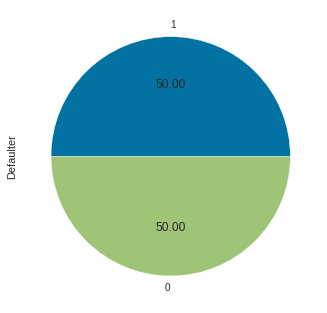

In [ ]:
random_over_sampler_y_train.value_counts().plot.pie(autopct='%.2f')

## Logistic RandomOver Sampling

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      5841
           1       0.37      0.64      0.47      1659

    accuracy                           0.68      7500
   macro avg       0.62      0.66      0.62      7500
weighted avg       0.76      0.68      0.70      7500



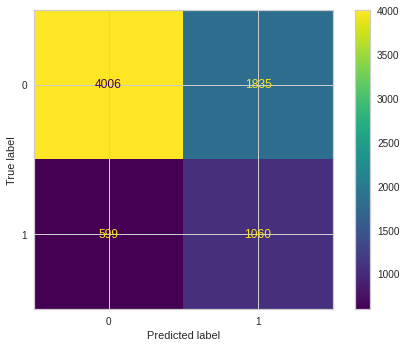

In [ ]:
log_classifier_ros = LogisticRegression()
log_classifier_ros.fit(random_over_sampler_x_train, random_over_sampler_y_train)
log_y_pred_ros = log_classifier_ros.predict(X_test_robust)
eva(y_test,log_y_pred_ros)

In [ ]:
log_ros_f1_score=f1_score(y_test,log_y_pred_ros,average='macro')
log_ros_f1_score

0.6162584817281019

In [ ]:
# get roc_auc score
log_ros_roc_auc_score = metrics.roc_auc_score(y_test, log_y_pred_ros)
print("LogisticRegression Classifier Roc_AUC Score Is {}".format(log_ros_roc_auc_score))

LogisticRegression Classifier Roc_AUC Score Is 0.6623902927271303


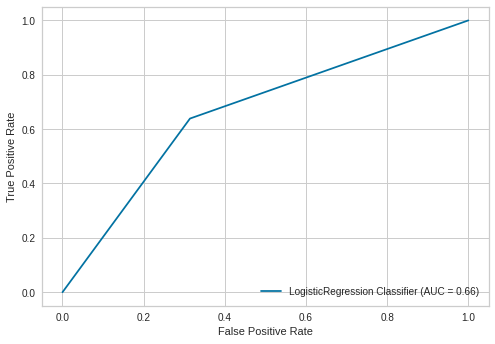

In [ ]:
plot_roc_auc_curve(log_y_pred_ros, "LogisticRegression Classifier")

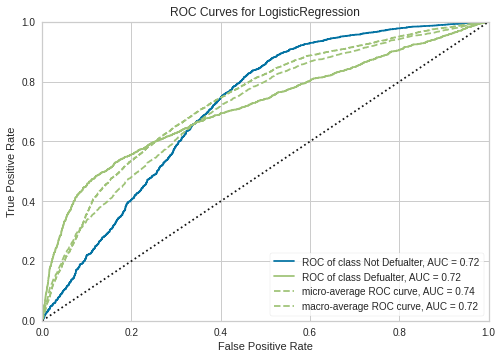

In [ ]:
visualizer = ROCAUC(log_classifier_ros, classes=["Not Defualter", "Defualter"])

visualizer.fit(random_over_sampler_x_train, random_over_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## SVC RandomOver Sampling

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      5841
           1       0.49      0.56      0.52      1659

    accuracy                           0.77      7500
   macro avg       0.68      0.70      0.69      7500
weighted avg       0.78      0.77      0.78      7500



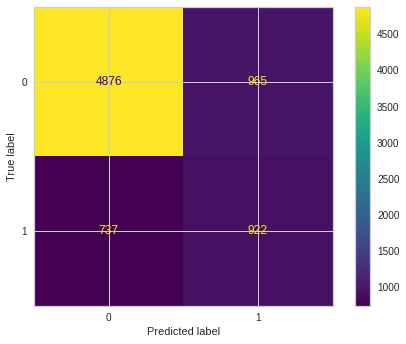

In [ ]:
svc_classifier_ros = SVC()
svc_classifier_ros.fit(random_over_sampler_x_train, random_over_sampler_y_train)
svc_y_pred_ros = svc_classifier_ros.predict(X_test_robust)
eva(y_test,svc_y_pred_ros)

In [ ]:
svc_ros_f1_score=f1_score(y_test,svc_y_pred_ros,average='macro')
svc_ros_f1_score

0.6857140915608286

In [ ]:
# get roc_auc score
svc_ros_roc_auc_score = metrics.roc_auc_score(y_test, svc_y_pred_ros)
print("SVC Classifier Roc_AUC Score Is {}".format(svc_ros_roc_auc_score))

SVC Classifier Roc_AUC Score Is 0.6952725217046178


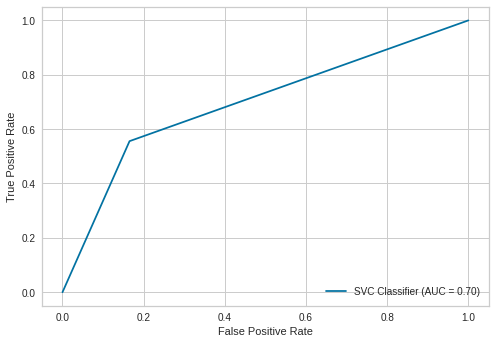

In [ ]:
plot_roc_auc_curve(svc_y_pred_ros, "SVC Classifier")

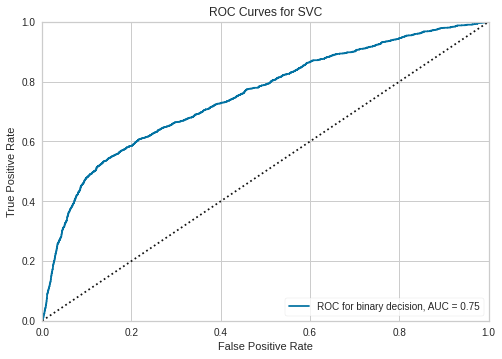

In [ ]:
visualizer = ROCAUC(svc_classifier_ros, classes=["Not Defualter", "Defualter"],binary=True)

visualizer.fit(random_over_sampler_x_train, random_over_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## Decision Tree RandomOver Sampling

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      5841
           1       0.39      0.39      0.39      1659

    accuracy                           0.73      7500
   macro avg       0.61      0.61      0.61      7500
weighted avg       0.73      0.73      0.73      7500



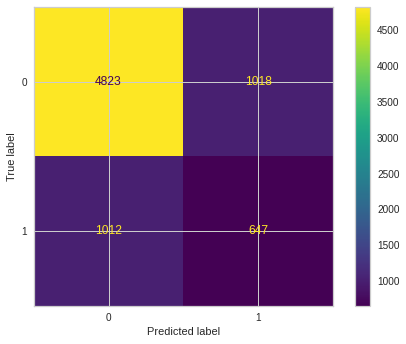

In [ ]:
dt_classifier_ros = DecisionTreeClassifier()
dt_classifier_ros.fit(random_over_sampler_x_train, random_over_sampler_y_train)
dt_y_pred_ros = dt_classifier_ros.predict(X_test_robust)
eva(y_test,dt_y_pred_ros)

In [ ]:
dt_ros_f1_score=f1_score(y_test,dt_y_pred_ros,average='macro')
dt_ros_f1_score

0.6077145503813556

In [ ]:
# get roc_auc score
dt_ros_roc_auc_score = metrics.roc_auc_score(y_test, dt_y_pred_ros)
print("Decision Tree Classifier Roc_AUC Score Is {}".format(dt_ros_roc_auc_score))

Decision Tree Classifier Roc_AUC Score Is 0.6078543735698853


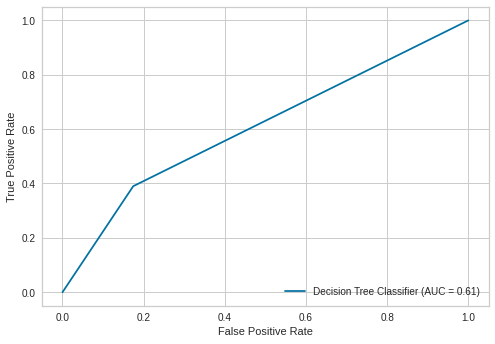

In [ ]:
plot_roc_auc_curve(dt_y_pred_ros, "Decision Tree Classifier")

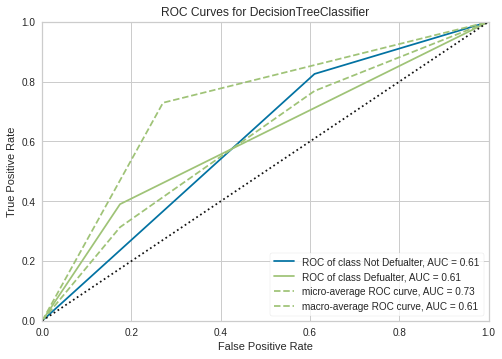

In [ ]:
visualizer = ROCAUC(dt_classifier_ros, classes=["Not Defualter", "Defualter"])

visualizer.fit(random_over_sampler_x_train, random_over_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## LGBMClassifier RandomOver Sampling

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5841
           1       0.47      0.62      0.53      1659

    accuracy                           0.76      7500
   macro avg       0.67      0.71      0.68      7500
weighted avg       0.79      0.76      0.77      7500



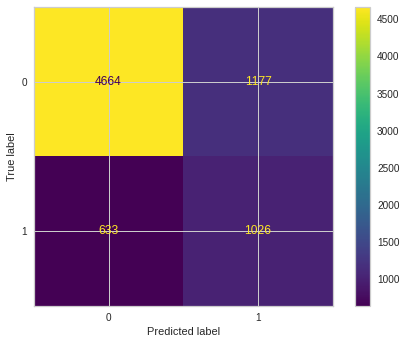

In [ ]:
# LGBMClassifier with scaled data
lgbm_classifier_ros = LGBMClassifier(random_state=42)
lgbm_classifier_ros.fit(random_over_sampler_x_train, random_over_sampler_y_train)
lgbm_ros_y_pred = lgbm_classifier_ros.predict(X_test_robust)
eva(y_test,lgbm_ros_y_pred)

In [ ]:
lgbm_ros_f1_score=f1_score(y_test,lgbm_ros_y_pred,average='macro')
lgbm_ros_f1_score

0.684412091459538

In [ ]:
# get roc_auc score
lgbm_ros_roc_auc_score = metrics.roc_auc_score(y_test, lgbm_ros_y_pred)
print("LGBMClassifier Roc_AUC Score Is {}".format(lgbm_ros_roc_auc_score))

LGBMClassifier Roc_AUC Score Is 0.7084691274779238


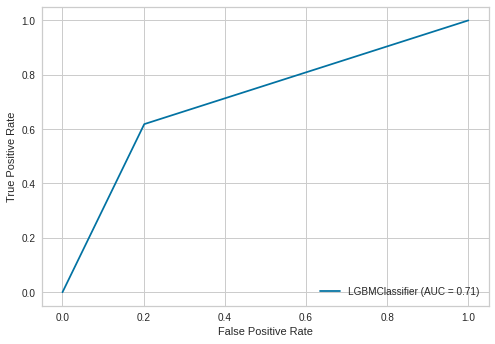

In [ ]:
plot_roc_auc_curve(lgbm_ros_y_pred, "LGBMClassifier")

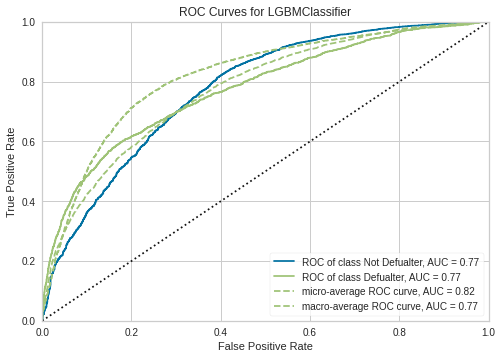

In [ ]:
visualizer = ROCAUC(lgbm_classifier_ros, classes=["Not Defualter", "Defualter"])

visualizer.fit(random_over_sampler_x_train, random_over_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## HistGradientBoostingClassifier RandomOver Sampling

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5841
           1       0.46      0.61      0.53      1659

    accuracy                           0.76      7500
   macro avg       0.67      0.71      0.68      7500
weighted avg       0.79      0.76      0.77      7500



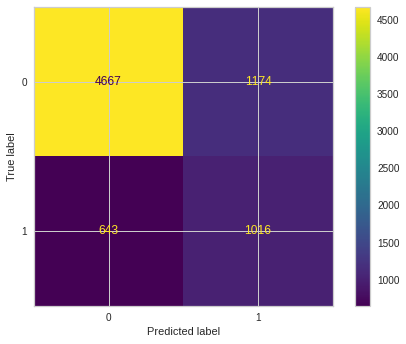

In [ ]:
# HistGradientBoostingClassifier with scaled data
hist_classifier_ros = HistGradientBoostingClassifier(random_state=42)
hist_classifier_ros.fit(random_over_sampler_x_train, random_over_sampler_y_train)
hist_ros_y_pred = hist_classifier_ros.predict(X_test_robust)
eva(y_test,hist_ros_y_pred)

In [ ]:
hist_ros_f1_score=f1_score(y_test,hist_ros_y_pred,average='macro')
hist_ros_f1_score

0.6824921524711478

In [ ]:
# get roc_auc score
hist_ros_roc_auc_score = metrics.roc_auc_score(y_test, hist_ros_y_pred)
print("HistGradientBoosting Classifier Roc_AUC Score Is {}".format(hist_ros_roc_auc_score))

HistGradientBoosting Classifier Roc_AUC Score Is 0.7057120690461175


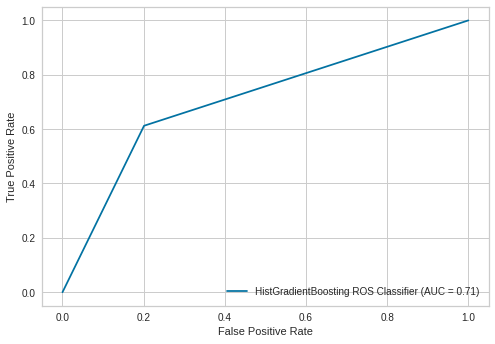

In [ ]:
plot_roc_auc_curve(hist_ros_y_pred, "HistGradientBoosting ROS Classifier")

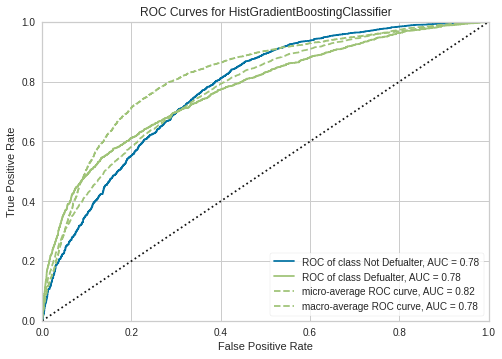

In [ ]:
visualizer = ROCAUC(hist_classifier_ros, classes=["Not Defualter", "Defualter"])

visualizer.fit(random_over_sampler_x_train, random_over_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## RANDOM FOREST RandomOver Sampling

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      5841
           1       0.60      0.43      0.50      1659

    accuracy                           0.81      7500
   macro avg       0.73      0.67      0.69      7500
weighted avg       0.80      0.81      0.80      7500



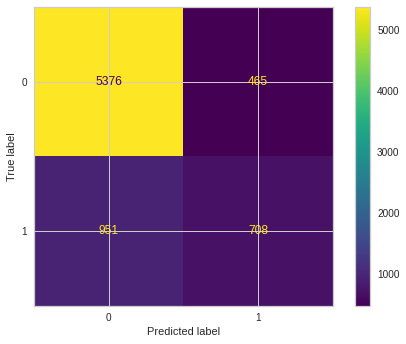

In [ ]:
# RandomForestClassifier with scaling data and with oversampling using SMOTE
rfc_classifier_ros=RandomForestClassifier(random_state=42)
rfc_classifier_ros.fit(random_over_sampler_x_train, random_over_sampler_y_train)
rfc_y_pred_ros = rfc_classifier_ros.predict(X_test_robust)
eva(y_test,rfc_y_pred_ros)

In [ ]:
rfc_ros_f1_score=f1_score(y_test,rfc_y_pred_ros,average='macro')
rfc_ros_f1_score

0.6918145956607495

In [ ]:
# get roc_auc score
rfc_ros_roc_auc_score = metrics.roc_auc_score(y_test, rfc_y_pred_ros)
print("RANDOM FOREST ROS Classifier Roc_AUC Score Is {}".format(rfc_ros_roc_auc_score))

RANDOM FOREST ROS Classifier Roc_AUC Score Is 0.6735767272132859


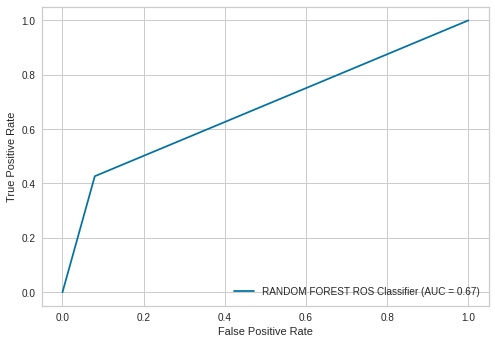

In [ ]:
plot_roc_auc_curve(rfc_y_pred_ros, "RANDOM FOREST ROS Classifier")

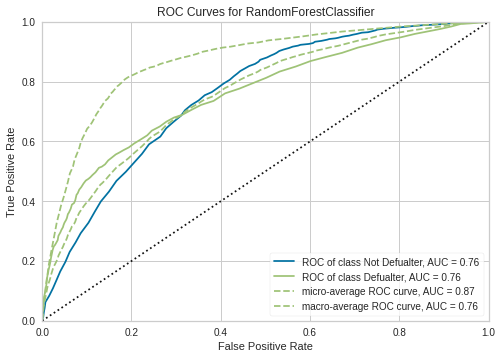

In [ ]:
visualizer = ROCAUC(rfc_classifier_ros, classes=["Not Defualter", "Defualter"])

visualizer.fit(random_over_sampler_x_train, random_over_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## XGBOOST RandomOver Sampling

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5841
           1       0.47      0.62      0.53      1659

    accuracy                           0.76      7500
   macro avg       0.67      0.71      0.69      7500
weighted avg       0.79      0.76      0.77      7500



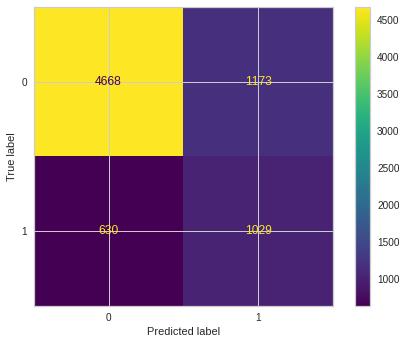

In [ ]:
xgb_clf_ros = XGBClassifier(random_state=42)
xgb_clf_ros.fit(random_over_sampler_x_train, random_over_sampler_y_train)
xgb_ros_y_pred = xgb_clf_ros.predict(X_test_robust)
eva(y_test,xgb_ros_y_pred)

In [ ]:
xgb_ros_f1_score=f1_score(y_test,xgb_ros_y_pred,average='macro')
xgb_ros_f1_score

0.6855794054824489

In [ ]:
# get roc_auc score
xgb_ros_roc_auc_score = metrics.roc_auc_score(y_test, xgb_ros_y_pred)
print("XGBOOST ROS Classifier Roc_AUC Score Is {}".format(xgb_ros_roc_auc_score))

XGBOOST ROS Classifier Roc_AUC Score Is 0.7097156937319993


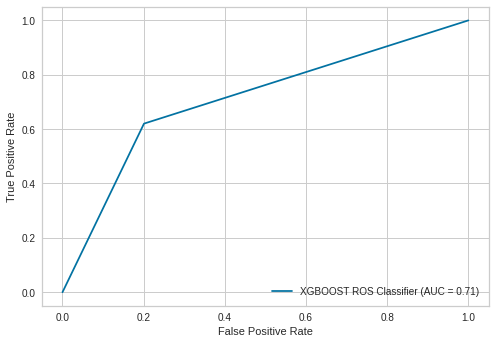

In [ ]:
plot_roc_auc_curve(xgb_ros_y_pred, "XGBOOST ROS Classifier")

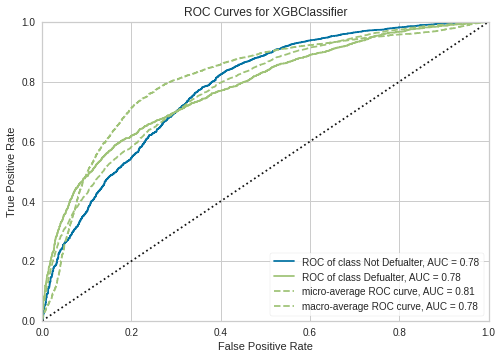

In [ ]:
visualizer = ROCAUC(xgb_clf_ros, classes=["Not Defualter", "Defualter"])

visualizer.fit(random_over_sampler_x_train, random_over_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

# RandomOver Sampling scores

In [ ]:
scores_val_ROS = [log_ros_f1_score,svc_ros_f1_score,dt_ros_f1_score,lgbm_ros_f1_score,hist_ros_f1_score,rfc_ros_f1_score,xgb_ros_f1_score]
scores_name_ROS=['Logistic_ROS','SVC_ROS','DT_ROS','LGBM_ROS','Hist_ROS','RandomForest_ROS','XGBoost_ROS']
col_name_ROS = ['F1_Random_Over_Sampling']

In [ ]:
ROS_scores = pd.DataFrame(data=scores_val_ROS,index=scores_name_ROS,columns=col_name_ROS)
ROS_scores.reset_index(inplace=True)
ROS_scores

index  F1_Random_Over_Sampling
0      Logistic_ROS                     0.62
1           SVC_ROS                     0.69
2            DT_ROS                     0.62
3          LGBM_ROS                     0.68
4          Hist_ROS                     0.68
5  RandomForest_ROS                     0.69
6       XGBoost_ROS                     0.68

# ------------------Sperator---------------------------

# EditedNearestNeighbours

In [ ]:
# initialize EditedNearestNeighbours variable
edited_nn_sampler = EditedNearestNeighbours()
edited_nn_sampler_x_train, edited_nn_sampler_y_train = edited_nn_sampler.fit_resample(X_train_robust, y_train)

In [ ]:
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models, predictions = clf.fit(edited_nn_sampler_x_train, X_test_robust, edited_nn_sampler_y_train, y_test)
# models

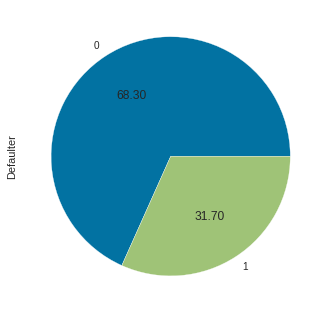

In [ ]:
edited_nn_sampler_y_train.value_counts().plot.pie(autopct='%.2f')

## Logistic EditedNearestNeighbours

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      5841
           1       0.57      0.44      0.50      1659

    accuracy                           0.80      7500
   macro avg       0.71      0.67      0.69      7500
weighted avg       0.79      0.80      0.79      7500



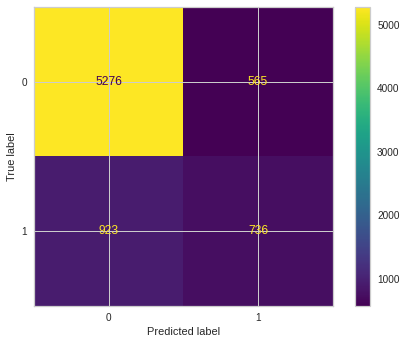

In [ ]:
log_classifier_enn = LogisticRegression()
log_classifier_enn.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)
log_enn_y_pred = log_classifier_enn.predict(X_test_robust)
eva(y_test,log_enn_y_pred)

In [ ]:
log_enn_f1_score=f1_score(y_test,log_enn_y_pred,average='macro')
log_enn_f1_score

0.6868546287150938

In [ ]:
# get roc_auc score
log_enn_roc_auc_score = metrics.roc_auc_score(y_test, log_enn_y_pred)
print("LogisticRegression Classifier Roc_AUC Score Is {}".format(log_enn_roc_auc_score))

LogisticRegression Classifier Roc_AUC Score Is 0.6734553677269832


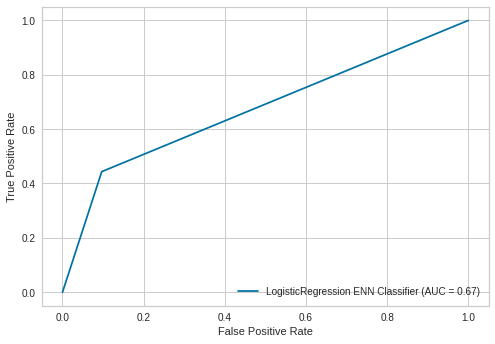

In [ ]:
plot_roc_auc_curve(log_enn_y_pred, "LogisticRegression ENN Classifier")

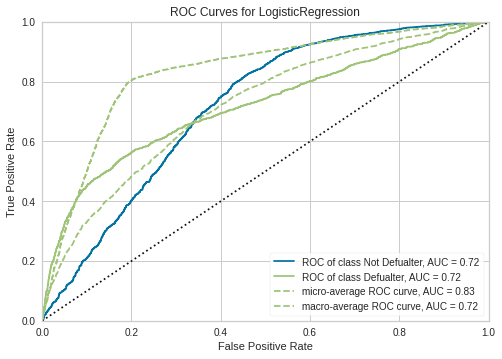

In [ ]:
visualizer = ROCAUC(log_classifier_enn, classes=["Not Defualter", "Defualter"])

visualizer.fit(smote_x_train, smote_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## SVC EditedNearestNeighbours

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      5841
           1       0.55      0.50      0.52      1659

    accuracy                           0.80      7500
   macro avg       0.70      0.69      0.70      7500
weighted avg       0.79      0.80      0.79      7500



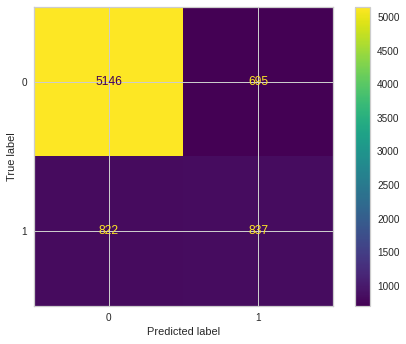

In [ ]:
svc_classifier_enn = SVC()
svc_classifier_enn.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)
svc_enn_y_pred = svc_classifier_enn.predict(X_test_robust)
eva(y_test,svc_enn_y_pred)

In [ ]:
svc_enn_f1_score=f1_score(y_test,svc_enn_y_pred,average='macro')
svc_enn_f1_score

0.698069547845249

In [ ]:
# get roc_auc score
svc_enn_roc_auc_score = metrics.roc_auc_score(y_test, svc_enn_y_pred)
print("SVC Classifier Roc_AUC Score Is {}".format(svc_enn_roc_auc_score))

SVC Classifier Roc_AUC Score Is 0.692767160370679


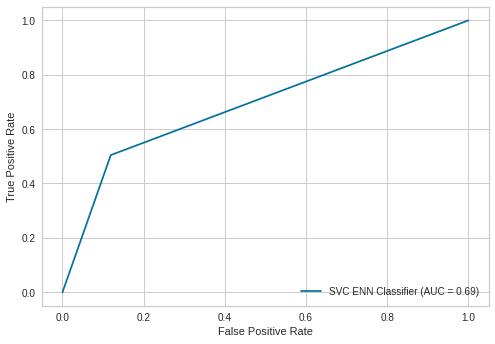

In [ ]:
plot_roc_auc_curve(svc_enn_y_pred, "SVC ENN Classifier")

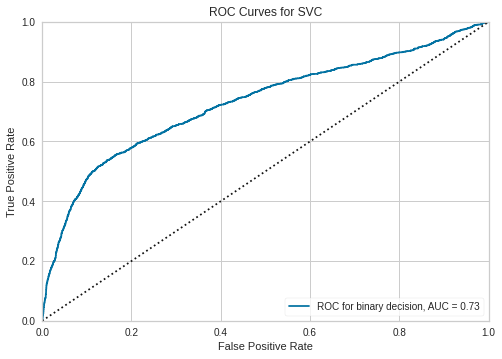

In [ ]:
visualizer = ROCAUC(svc_classifier_enn, classes=["Not Defualter", "Defualter"],binary=True)

visualizer.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## Decision Tree EditedNearestNeighbours 

              precision    recall  f1-score   support

           0       0.87      0.72      0.79      5841
           1       0.38      0.61      0.47      1659

    accuracy                           0.70      7500
   macro avg       0.63      0.67      0.63      7500
weighted avg       0.76      0.70      0.72      7500



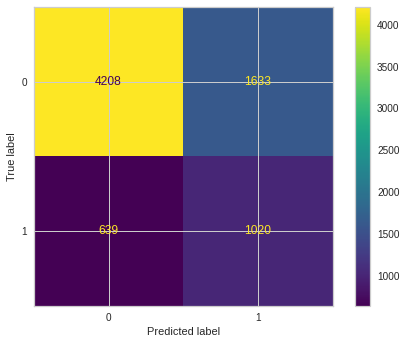

In [ ]:
dt_classifier_enn = DecisionTreeClassifier()
dt_classifier_enn.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)
dt_enn_y_pred = dt_classifier_enn.predict(X_test_robust)
eva(y_test,dt_enn_y_pred)

In [ ]:
dt_enn_f1_score=f1_score(y_test,dt_enn_y_pred,average='macro')
dt_enn_f1_score

0.6302617399708932

In [ ]:
# get roc_auc score
dt_enn_roc_auc_score = metrics.roc_auc_score(y_test, dt_enn_y_pred)
print("Decision Tree Classifier Roc_AUC Score Is {}".format(dt_enn_roc_auc_score))

Decision Tree Classifier Roc_AUC Score Is 0.6676263972981415


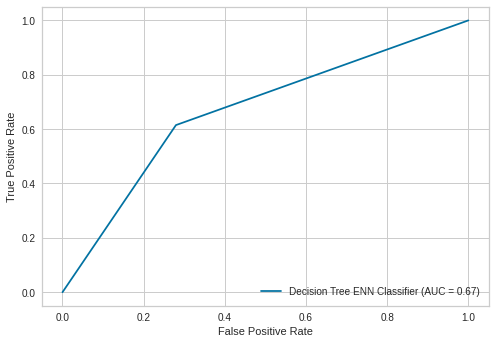

In [ ]:
plot_roc_auc_curve(dt_enn_y_pred, "Decision Tree ENN Classifier")

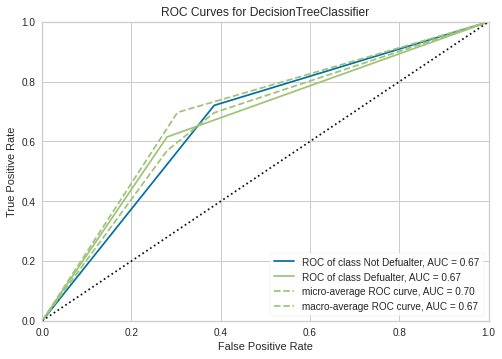

In [ ]:
visualizer = ROCAUC(dt_classifier_enn, classes=["Not Defualter", "Defualter"])

visualizer.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## LGBMClassifier EditedNearestNeighbours

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      5841
           1       0.50      0.57      0.53      1659

    accuracy                           0.78      7500
   macro avg       0.69      0.70      0.69      7500
weighted avg       0.79      0.78      0.78      7500



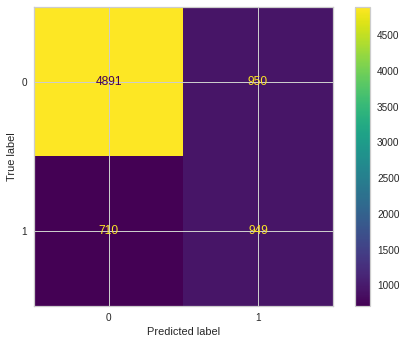

In [ ]:
# LGBMClassifier with scaled data
lgbm_classifier_enn = LGBMClassifier(random_state=42)
lgbm_classifier_enn.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)
lgbm_enn_y_pred = lgbm_classifier_enn.predict(X_test_robust)
eva(y_test,lgbm_enn_y_pred)

In [ ]:
lgbm_enn_f1_score=f1_score(y_test,lgbm_enn_y_pred,average='macro')
lgbm_enn_f1_score

0.6941831122461462

In [ ]:
# get roc_auc score
lgbm_enn_roc_auc_score = metrics.roc_auc_score(y_test, lgbm_enn_y_pred)
print("LGBMClassifier Classifier Roc_AUC Score Is {}".format(lgbm_enn_roc_auc_score))

LGBMClassifier Classifier Roc_AUC Score Is 0.7046939806004384


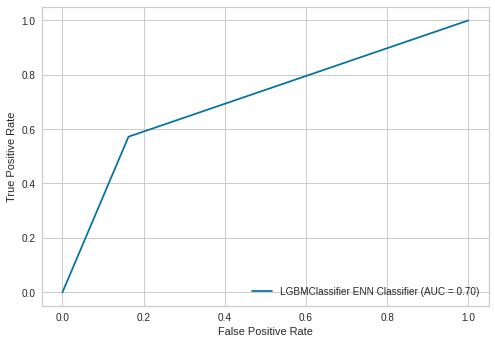

In [ ]:
plot_roc_auc_curve(lgbm_enn_y_pred, "LGBMClassifier ENN Classifier")

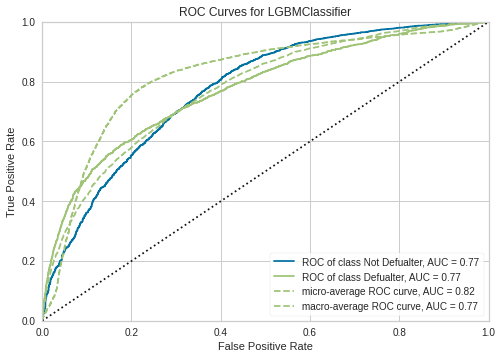

In [ ]:
visualizer = ROCAUC(lgbm_classifier_enn, classes=["Not Defualter", "Defualter"])

visualizer.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## HistGradientBoostingClassifier EditedNearestNeighbours

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      5841
           1       0.51      0.58      0.54      1659

    accuracy                           0.78      7500
   macro avg       0.69      0.71      0.70      7500
weighted avg       0.79      0.78      0.79      7500



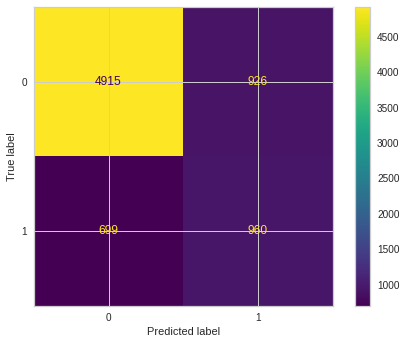

In [ ]:
# HistGradientBoostingClassifier with scaled data
hist_classifier_enn = HistGradientBoostingClassifier(random_state=42)
hist_classifier_enn.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)
hist_enn_y_pred = hist_classifier_enn.predict(X_test_robust)
eva(y_test,hist_enn_y_pred)

In [ ]:
hist_enn_f1_score=f1_score(y_test,hist_enn_y_pred,average='macro')
hist_enn_f1_score

0.6998742242133473

In [ ]:
# get roc_auc score
hist_enn_roc_auc_score = metrics.roc_auc_score(y_test, hist_enn_y_pred)
print("HistGradientBoostingClassifier Roc_AUC Score Is {}".format(hist_enn_roc_auc_score))

HistGradientBoostingClassifier Roc_AUC Score Is 0.7100636734835404


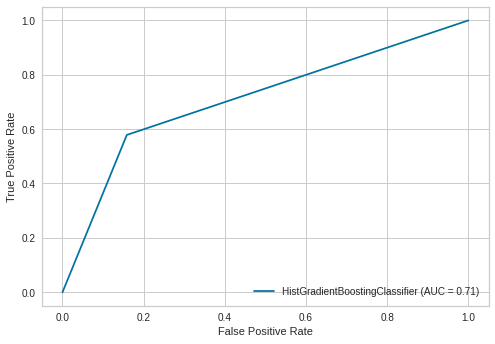

In [ ]:
plot_roc_auc_curve(hist_enn_y_pred, "HistGradientBoostingClassifier")

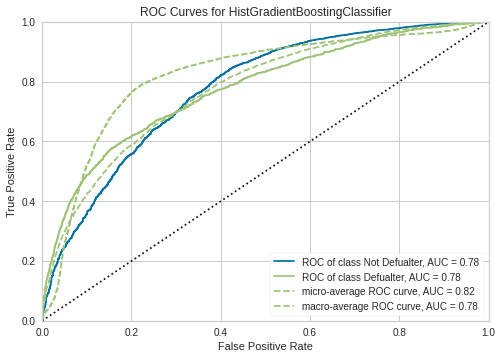

In [ ]:
visualizer = ROCAUC(hist_classifier_enn, classes=["Not Defualter", "Defualter"])

visualizer.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## RANDOM FOREST EditedNearestNeighbours

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      5841
           1       0.50      0.58      0.54      1659

    accuracy                           0.78      7500
   macro avg       0.69      0.71      0.70      7500
weighted avg       0.79      0.78      0.79      7500



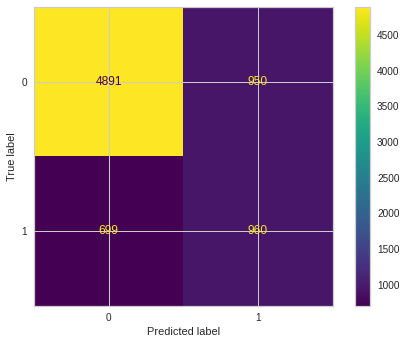

In [ ]:
# RandomForestClassifier with scaling data and with oversampling using SMOTE
rfc_classifier_enn=RandomForestClassifier(random_state=42)
rfc_classifier_enn.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)
rfc_enn_y_pred = rfc_classifier_enn.predict(X_test_robust)
eva(y_test,rfc_enn_y_pred)

In [ ]:
rfc_enn_f1_score=f1_score(y_test,rfc_enn_y_pred,average='macro')
rfc_enn_f1_score

0.6968544856675227

In [ ]:
# get roc_auc score
rfc_enn_roc_auc_score = metrics.roc_auc_score(y_test, rfc_enn_y_pred)
print("RANDOM FOREST ENN Classifier Roc_AUC Score Is {}".format(rfc_enn_roc_auc_score))

RANDOM FOREST ENN Classifier Roc_AUC Score Is 0.7080092307511315


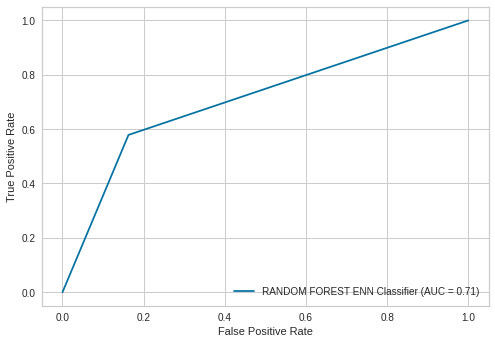

In [ ]:
plot_roc_auc_curve(rfc_enn_y_pred, "RANDOM FOREST ENN Classifier")

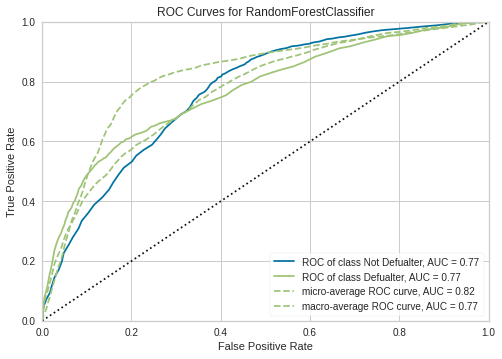

In [ ]:
visualizer = ROCAUC(rfc_classifier_enn, classes=["Not Defualter", "Defualter"])

visualizer.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## XGBOOST EditedNearestNeighbours

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      5841
           1       0.52      0.55      0.53      1659

    accuracy                           0.79      7500
   macro avg       0.70      0.70      0.70      7500
weighted avg       0.79      0.79      0.79      7500



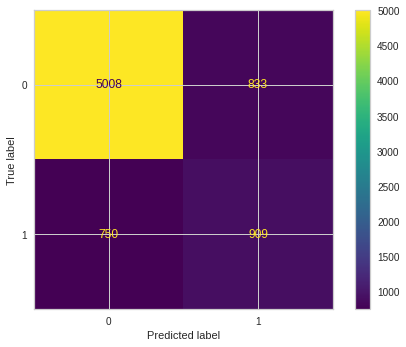

In [ ]:
xgb_clf_enn = XGBClassifier(random_state=42)
xgb_clf_enn.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)
xgb_enn_y_pred = xgb_clf_enn.predict(X_test_robust)
eva(y_test,xgb_enn_y_pred)

In [ ]:
xgb_enn_f1_score=f1_score(y_test,xgb_enn_y_pred,average='macro')
xgb_enn_f1_score

0.6990356898169168

In [ ]:
# get roc_auc score
xgb_enn_roc_auc_score = metrics.roc_auc_score(y_test, xgb_enn_y_pred)
print("XGBOOST ENN Classifier Roc_AUC Score Is {}".format(xgb_enn_roc_auc_score))

XGBOOST ENN Classifier Roc_AUC Score Is 0.7026539338275016


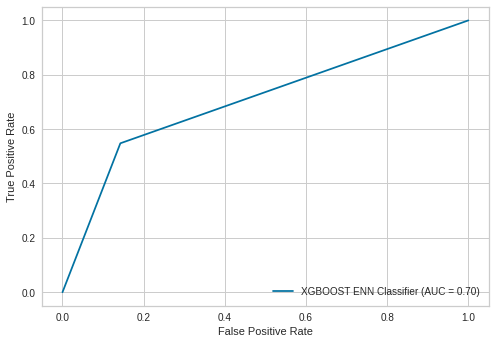

In [ ]:
plot_roc_auc_curve(xgb_enn_y_pred, "XGBOOST ENN Classifier")

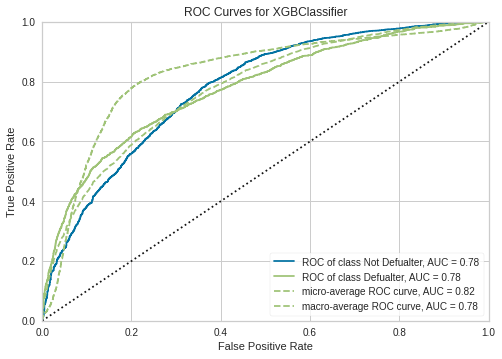

In [ ]:
visualizer = ROCAUC(xgb_clf_enn, classes=["Not Defualter", "Defualter"])

visualizer.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

# ENN Sampling scores

In [ ]:
scores_val_ENN = [log_enn_f1_score,svc_enn_f1_score,dt_enn_f1_score,lgbm_enn_f1_score,hist_enn_f1_score,rfc_enn_f1_score,xgb_enn_f1_score]
scores_name_ENN=['Logistic_ENN','SVC_ENN','DT_ENN','LGBM_ENN','HIST_ENN','RandomForest_ENN','XGBoost_ENN']
col_name_ENN = ['F1_ENN_Sampling']

In [ ]:
ENN_scores = pd.DataFrame(data=scores_val_ENN,index=scores_name_ENN,columns=col_name_ENN)
ENN_scores.reset_index(inplace=True)
ENN_scores

index  F1_ENN_Sampling
0      Logistic_ENN             0.69
1           SVC_ENN             0.70
2            DT_ENN             0.62
3          LGBM_ENN             0.70
4          HIST_ENN             0.70
5  RandomForest_ENN             0.69
6       XGBoost_ENN             0.70

# ------------------Sperator---------------------------

# RandomUnderSampling

In [ ]:
# initialize RandomUnderSampling variable
random_under_sampler = RandomUnderSampler(random_state=42)
random_under_sampler_x_train, random_under_sampler_y_train = random_under_sampler.fit_resample(X_train_robust, y_train)

In [ ]:
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models, predictions = clf.fit(random_under_sampler_x_train, X_test_robust, random_under_sampler_y_train, y_test)
# models

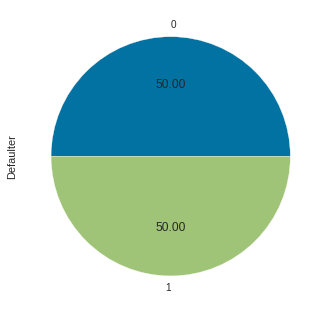

In [ ]:
random_under_sampler_y_train.value_counts().plot.pie(autopct='%.2f')

## Logistic RandomUnderSampling

              precision    recall  f1-score   support

           0       0.87      0.70      0.78      5841
           1       0.37      0.63      0.47      1659

    accuracy                           0.68      7500
   macro avg       0.62      0.66      0.62      7500
weighted avg       0.76      0.68      0.71      7500



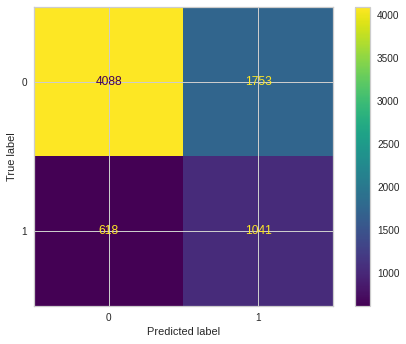

In [ ]:
log_classifier_rus = LogisticRegression()
log_classifier_rus.fit(random_under_sampler_x_train, random_under_sampler_y_train)
log_rus_y_pred = log_classifier_rus.predict(X_test_robust)
eva(y_test,log_rus_y_pred)

In [ ]:
log_rus_f1_score=f1_score(y_test,log_rus_y_pred,average='macro')
log_rus_f1_score

0.6213733523619351

In [ ]:
# get roc_auc score
log_rus_roc_auc_score = metrics.roc_auc_score(y_test, log_rus_y_pred)
print("LogisticRegression Classifier Roc_AUC Score Is {}".format(log_rus_roc_auc_score))

LogisticRegression Classifier Roc_AUC Score Is 0.663683297560148


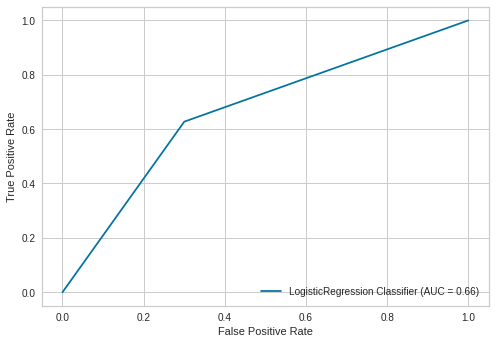

In [ ]:
plot_roc_auc_curve(log_rus_y_pred, "LogisticRegression Classifier")

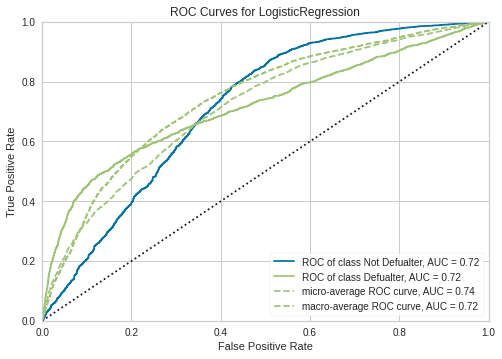

In [ ]:
visualizer = ROCAUC(log_classifier_rus, classes=["Not Defualter", "Defualter"])

visualizer.fit(random_under_sampler_x_train, random_under_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## SVC RandomUnderSampling

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      5841
           1       0.50      0.54      0.52      1659

    accuracy                           0.78      7500
   macro avg       0.68      0.69      0.69      7500
weighted avg       0.79      0.78      0.78      7500



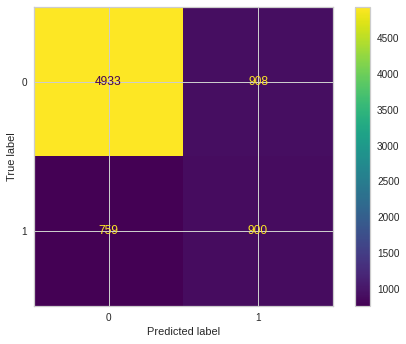

In [ ]:
svc_classifier_rus = SVC()
svc_classifier_rus.fit(random_under_sampler_x_train, random_under_sampler_y_train)
svc_rus_y_pred = svc_classifier_rus.predict(X_test_robust)
eva(y_test,svc_rus_y_pred)

In [ ]:
svc_rus_f1_score=f1_score(y_test,svc_rus_y_pred,average='macro')
svc_rus_f1_score

0.6873195491169156

In [ ]:
# get roc_auc score
svc_rus_roc_auc_score = metrics.roc_auc_score(y_test, svc_rus_y_pred)
print("SVC Classifier Roc_AUC Score Is {}".format(svc_rus_roc_auc_score))

SVC Classifier Roc_AUC Score Is 0.6935213228927024


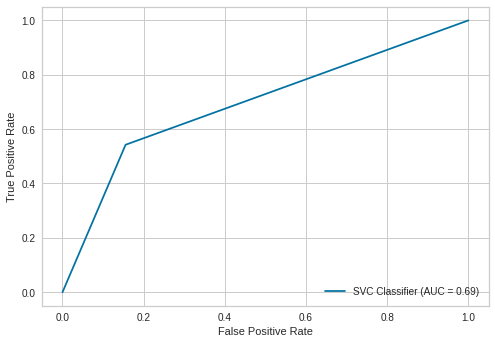

In [ ]:
plot_roc_auc_curve(svc_rus_y_pred, "SVC Classifier")

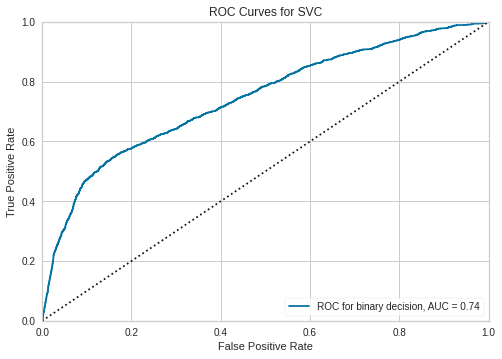

In [ ]:
visualizer = ROCAUC(svc_classifier_rus, classes=["Not Defualter", "Defualter"],binary=True)

visualizer.fit(random_under_sampler_x_train, random_under_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## Decision Tree RandomUnderSampling

              precision    recall  f1-score   support

           0       0.85      0.61      0.71      5841
           1       0.31      0.61      0.41      1659

    accuracy                           0.61      7500
   macro avg       0.58      0.61      0.56      7500
weighted avg       0.73      0.61      0.64      7500



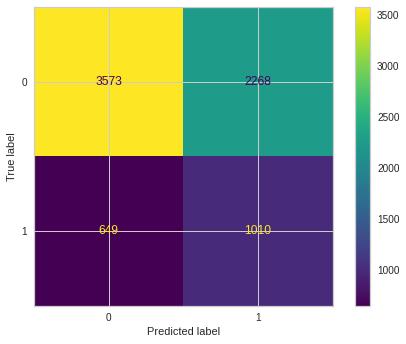

In [ ]:
dt_classifier_rus = DecisionTreeClassifier()
dt_classifier_rus.fit(random_under_sampler_x_train, random_under_sampler_y_train)
dt_rus_y_pred = dt_classifier_rus.predict(X_test_robust)
eva(y_test,dt_rus_y_pred)

In [ ]:
dt_rus_f1_score=f1_score(y_test,dt_rus_y_pred,average='macro')
dt_rus_f1_score

0.5596407812068152

In [ ]:
# get roc_auc score
dt_rus_roc_auc_score = metrics.roc_auc_score(y_test, dt_rus_y_pred)
print("Decision Tree Classifier Roc_AUC Score Is {}".format(dt_rus_roc_auc_score))

Decision Tree Classifier Roc_AUC Score Is 0.610255402896467


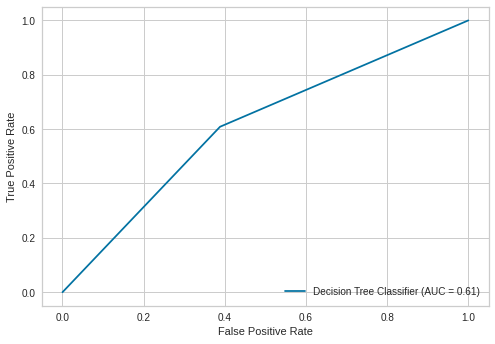

In [ ]:
plot_roc_auc_curve(dt_rus_y_pred, "Decision Tree Classifier")

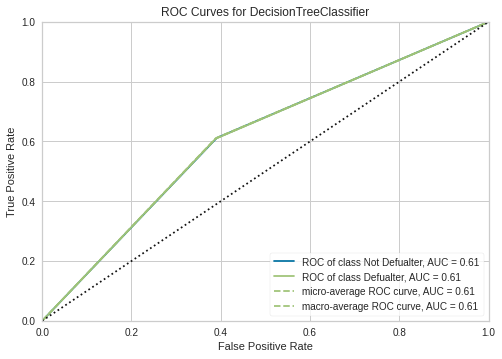

In [ ]:
visualizer = ROCAUC(dt_classifier_rus, classes=["Not Defualter", "Defualter"])

visualizer.fit(random_under_sampler_x_train, random_under_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## LGBMClassifier Random Under Sampling

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      5841
           1       0.43      0.64      0.52      1659

    accuracy                           0.74      7500
   macro avg       0.66      0.70      0.67      7500
weighted avg       0.78      0.74      0.75      7500



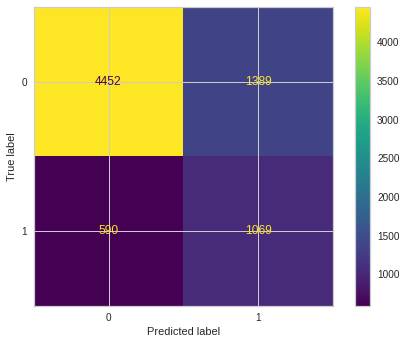

In [ ]:
# LGBMClassifier with scaled data
lgbm_classifier_rus = LGBMClassifier(random_state=42)
lgbm_classifier_rus.fit(random_under_sampler_x_train, random_under_sampler_y_train)
lgbm_rus_y_pred = lgbm_classifier_rus.predict(X_test_robust)
eva(y_test,lgbm_rus_y_pred)

In [ ]:
lgbm_rus_f1_score=f1_score(y_test,lgbm_rus_y_pred,average='macro')
lgbm_rus_f1_score

0.6687334677801924

In [ ]:
# get roc_auc score
lgbm_rus_roc_auc_score = metrics.roc_auc_score(y_test, lgbm_rus_y_pred)
print("LGBM Classifier Roc_AUC Score Is {}".format(lgbm_rus_roc_auc_score))

LGBM Classifier Roc_AUC Score Is 0.7032811642337496


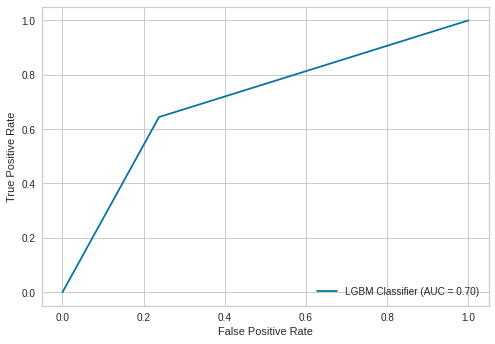

In [ ]:
plot_roc_auc_curve(lgbm_rus_y_pred, "LGBM Classifier")

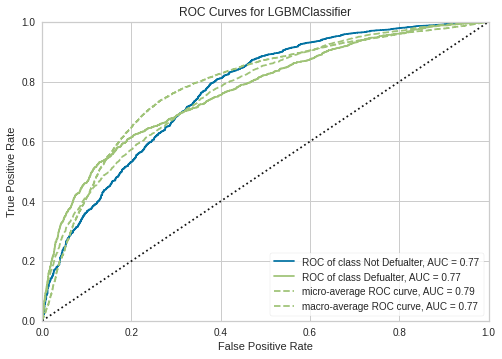

In [ ]:
visualizer = ROCAUC(lgbm_classifier_rus, classes=["Not Defualter", "Defualter"])

visualizer.fit(random_under_sampler_x_train, random_under_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## HistGradientBoostingClassifier  Random Under Sampling

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      5841
           1       0.43      0.65      0.52      1659

    accuracy                           0.73      7500
   macro avg       0.66      0.70      0.67      7500
weighted avg       0.78      0.73      0.75      7500



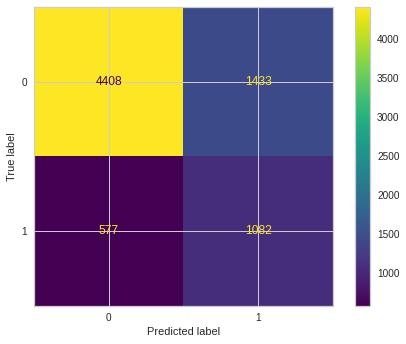

In [ ]:
# HistGradientBoostingClassifier with scaled data
hist_classifier_rus = HistGradientBoostingClassifier(random_state=42)
hist_classifier_rus.fit(random_under_sampler_x_train, random_under_sampler_y_train)
hist_rus_y_pred = hist_classifier_rus.predict(X_test_robust)
eva(y_test,hist_rus_y_pred)

In [ ]:
hist_rus_f1_score=f1_score(y_test,hist_rus_y_pred,average='macro')
hist_rus_f1_score

0.6663916952312092

In [ ]:
# get roc_auc score
hist_rus_roc_auc_score = metrics.roc_auc_score(y_test, hist_rus_y_pred)
print("HistGradientBoosting Classifier Roc_AUC Score Is {}".format(hist_rus_roc_auc_score))

HistGradientBoosting Classifier Roc_AUC Score Is 0.7034327087963647


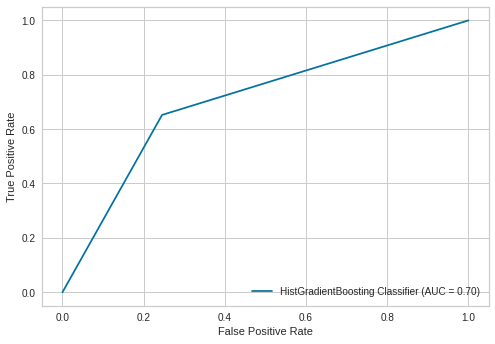

In [ ]:
plot_roc_auc_curve(hist_rus_y_pred, "HistGradientBoosting Classifier")

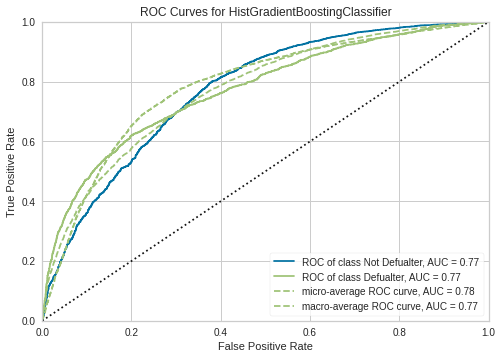

In [ ]:
visualizer = ROCAUC(hist_classifier_rus, classes=["Not Defualter", "Defualter"])
visualizer.fit(random_under_sampler_x_train, random_under_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## RANDOM FOREST Random Under Sampling

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      5841
           1       0.42      0.63      0.50      1659

    accuracy                           0.73      7500
   macro avg       0.65      0.69      0.66      7500
weighted avg       0.78      0.73      0.74      7500



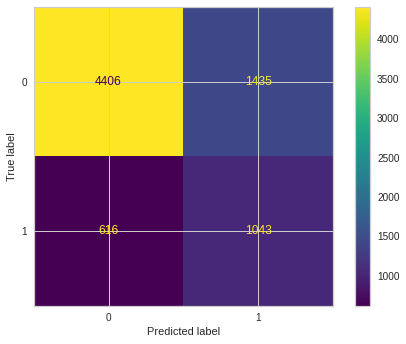

In [ ]:
# RandomForestClassifier with scaling data and with oversampling using SMOTE
rfc_classifier_rus=RandomForestClassifier(n_estimators=50,random_state=42)
rfc_classifier_rus.fit(random_under_sampler_x_train, random_under_sampler_y_train)
rfc_rus_y_pred = rfc_classifier_rus.predict(X_test_robust)
eva(y_test,rfc_rus_y_pred)

In [ ]:
rfc_rus_f1_score=f1_score(y_test,rfc_rus_y_pred,average='macro')
rfc_rus_f1_score

0.6577120397979264

In [ ]:
# get roc_auc score
rfc_rus_roc_auc_score = metrics.roc_auc_score(y_test, rfc_rus_y_pred)
print("RANDOM FOREST Classifier Roc_AUC Score Is {}".format(rfc_rus_roc_auc_score))

RANDOM FOREST Classifier Roc_AUC Score Is 0.6915074365192366


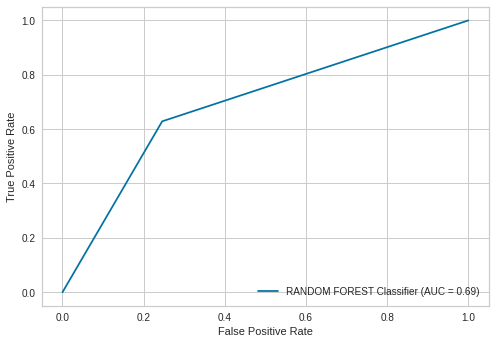

In [ ]:
plot_roc_auc_curve(rfc_rus_y_pred, "RANDOM FOREST Classifier")

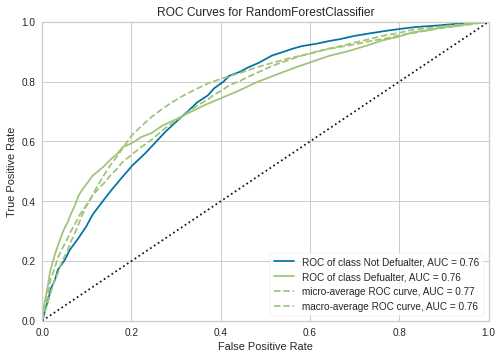

In [ ]:
visualizer = ROCAUC(rfc_classifier_rus, classes=["Not Defualter", "Defualter"])

visualizer.fit(random_under_sampler_x_train, random_under_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## XGBOOST Random Under Sampling

              precision    recall  f1-score   support

           0       0.88      0.79      0.84      5841
           1       0.47      0.64      0.54      1659

    accuracy                           0.76      7500
   macro avg       0.67      0.71      0.69      7500
weighted avg       0.79      0.76      0.77      7500



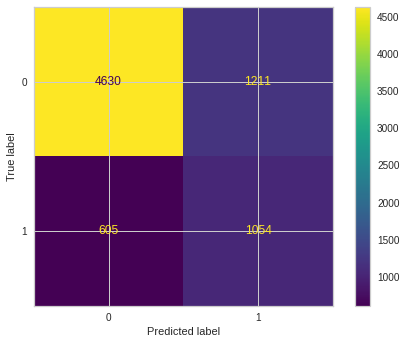

In [ ]:
xgb_clf_rus = XGBClassifier(random_state=42)
xgb_clf_rus.fit(random_under_sampler_x_train, random_under_sampler_y_train)
xgb_rus_y_pred = xgb_clf_rus.predict(X_test_robust)
eva(y_test,xgb_rus_y_pred)

In [ ]:
xgb_rus_f1_score=f1_score(y_test,xgb_rus_y_pred,average='macro')
xgb_rus_f1_score

0.6866244120411326

In [ ]:
# get roc_auc score
xgb_rus_clf_roc_auc_score = metrics.roc_auc_score(y_test, xgb_rus_y_pred)
print("XGBOOST Classifier Roc_AUC Score Is {}".format(xgb_rus_clf_roc_auc_score))

XGBOOST Classifier Roc_AUC Score Is 0.7139974855057454


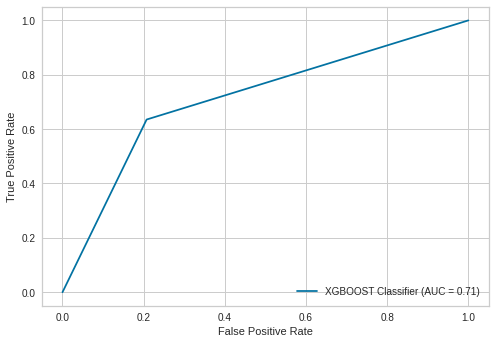

In [ ]:
plot_roc_auc_curve(xgb_rus_y_pred, "XGBOOST Classifier")

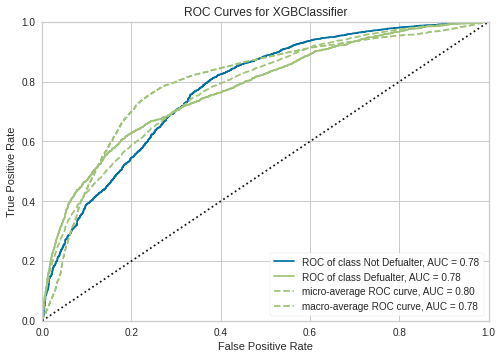

In [ ]:
visualizer = ROCAUC(xgb_clf_rus, classes=["Not Defualter", "Defualter"])

visualizer.fit(random_under_sampler_x_train, random_under_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

# Random Under Sampling scores

In [ ]:
scores_val_RUS = [log_rus_f1_score,svc_rus_f1_score,dt_rus_f1_score,lgbm_rus_f1_score,hist_rus_f1_score,rfc_rus_f1_score,xgb_rus_f1_score]
scores_name_RUS=['Logistic_RUS','SVC_RUS','DT_RUS','LGBM_RUS','HIST_RUS','RandomForest_RUS','XGBoost_RUS']
col_name_RUS = ['F1_Random_Under_Sampling']

In [ ]:
RUS_scores = pd.DataFrame(data=scores_val_RUS,index=scores_name_RUS,columns=col_name_RUS)
RUS_scores.reset_index(inplace=True)

In [ ]:
RUS_scores

index  F1_Random_Under_Sampling
0      Logistic_RUS                      0.62
1           SVC_RUS                      0.69
2            DT_RUS                      0.57
3          LGBM_RUS                      0.67
4          HIST_RUS                      0.67
5  RandomForest_RUS                      0.66
6       XGBoost_RUS                      0.68

# ------------------Sperator---------------------------

In [ ]:
ggffgfgfggfhgf

NameError: ignored

In [ ]:
from sklearn.cluster import KMeans


# Sample data


# Initialize KMeans model with k = 2
kmeans = KMeans(n_clusters=2)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Print the cluster assignments
print(labels)


[1 1 1 ... 1 1 1]


In [ ]:
fdx = pd.DataFrame([labels,y])

In [ ]:
fdx.T

0  1
0      1  1
1      1  1
2      1  0
3      1  0
4      1  0
...   .. ..
29995  0  0
29996  1  0
29997  1  1
29998  1  1
29999  1  1

[30000 rows x 2 columns]

# Feature Selection 

## ANOVA 


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
def find_best_num(model,X_train,Y_train,X_test ):
    fs = SelectKBest(score_func=model, k='all')
    fs.fit(X_train,Y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    # plot the scores
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.show()

In [ ]:
find_best_num(f_classif,random_over_sampler_x_train, random_over_sampler_y_train,X_test_robust )

In [ ]:
# define feature selection
fs1 = SelectKBest(score_func=f_classif, k=7)
# apply feature selection
XT_selected1 = fs1.fit_transform(random_over_sampler_x_train, random_over_sampler_y_train)
Xts_selected1 = fs1.transform(X_test_robust)
print(XT_selected1.shape)

## XGBOOST

In [ ]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(XT_selected1, random_over_sampler_y_train)
xgb_ros_y_pred = xgb_clf.predict(Xts_selected1)
eva(y_test,xgb_ros_y_pred)

In [ ]:
# get roc_auc score
xgb_ros_clf_roc_auc_score = metrics.roc_auc_score(y_test, xgb_ros_y_pred)
print("XGBOOST Classifier Roc_AUC Score Is {}".format(xgb_ros_clf_roc_auc_score))

In [ ]:
plot_roc_auc_curve(xgb_ros_y_pred, "XGBOOST Classifier")

In [ ]:
visualizer = ROCAUC(xgb_clf, classes=["Not Defualter", "Defualter"])

visualizer.fit(random_over_sampler_x_train, random_over_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(Xts_selected1, y_test)        # Evaluate the model on the test data
visualizer.show()

## LGBMClassifier

In [ ]:
find_best_num(f_classif,edited_nn_sampler_x_train, edited_nn_sampler_y_train,X_test_robust )

In [ ]:
# define feature selection
fs2 = SelectKBest(score_func=f_classif, k=7)
# apply feature selection
XT_selected2 = fs2.fit_transform(edited_nn_sampler_x_train, edited_nn_sampler_y_train)
Xts_selected2 = fs2.transform(X_test_robust)
print(XT_selected2.shape)

In [ ]:
# LGBMClassifier with scaled data
lgbm_classifier = LGBMClassifier(random_state=42)
lgbm_classifier.fit(XT_selected2, edited_nn_sampler_y_train)
lgbm_y_pred = lgbm_classifier.predict(Xts_selected2)
eva(y_test,lgbm_y_pred)

In [ ]:
# get roc_auc score
lgbm_enn_clf_roc_auc_score = metrics.roc_auc_score(y_test, lgbm_y_pred)
print("XGBOOST Classifier Roc_AUC Score Is {}".format(lgbm_enn_clf_roc_auc_score))

In [ ]:
plot_roc_auc_curve(lgbm_y_pred, "XGBOOST Classifier")

# ------------------Sperator---------------------------

# GridSearchCV

In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## HistGradientBoostingClassifier ENN

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters to search
hits_param_grid = {'learning_rate': [0.03]}

# Create the grid search object
hits_grid_search = GridSearchCV(hist_classifier_ros, hits_param_grid, cv=10, scoring='roc_auc')

# Fit the grid search object to the training data
hits_grid_search.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)

# Get the best combination of hyperparameters
best_params = hits_grid_search.best_params_

# Use the best combination of hyperparameters to make predictions on the test set
best_model = hits_grid_search.best_estimator_
hist_grid_y_pred = best_model.predict(X_test_robust)

# Evaluate model performance
eva(y_test, hist_grid_y_pred)


In [ ]:
hist_grid_f1_score=f1_score(y_test,hist_grid_y_pred,average='macro')
hist_grid_f1_score

In [ ]:
# get roc_auc score
hist_grid_roc_auc_score = metrics.roc_auc_score(y_test, hist_grid_y_pred)
print("HistGradientBoosting Grid Classifier Roc_AUC Score Is {}".format(hist_grid_roc_auc_score))

In [ ]:
plot_roc_auc_curve(hist_grid_y_pred, "HistGradientBoosting Grid Classifier")

In [ ]:
visualizer = ROCAUC(hits_grid_search, classes=["Not Defualter", "Defualter"])

visualizer.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

## LGBMClassifier RandomOver Sampling with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for GridSearchCV
param_grid = {
    "learning_rate": [0.03]
}

# Initialize the LGBMClassifier
lgbm_classifier = LGBMClassifier(random_state=42)

# Initialize GridSearchCV
lgbm_search = GridSearchCV(estimator=lgbm_classifier, param_grid=param_grid, n_jobs = 6,verbose=3, cv = 5)

# Fit the model on the training data
lgbm_search.fit(random_over_sampler_x_train, random_over_sampler_y_train)

# Make predictions on the test data
lgbm_y_pred = lgbm_search.predict(X_test_robust)

# Print the best parameters and best score
print("Best parameters:", lgbm_search.best_params_)
print("Best score: %.3f" % lgbm_search.best_score_)


In [ ]:
eva(y_test,lgbm_y_pred)

In [ ]:
# get roc_auc score
lgbm_ros_roc_auc_score = metrics.roc_auc_score(y_test, lgbm_y_pred)
print("LGBMClassifier Roc_AUC Score Is {}".format(lgbm_ros_roc_auc_score))

In [ ]:
plot_roc_auc_curve(lgbm_y_pred, "LGBMClassifier")

In [ ]:
visualizer = ROCAUC(lgbm_search, classes=["Not Defualter", "Defualter"])

visualizer.fit(random_over_sampler_x_train, random_over_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_robust, y_test)        # Evaluate the model on the test data
visualizer.show()

In [ ]:
# LGBMClassifier with scaled data
lgbm_classifier_ros = LGBMClassifier(learning_rate=0.03,random_state=42)
lgbm_classifier_ros.fit(random_over_sampler_x_train, random_over_sampler_y_train)
lgbm_ros_y_pred = lgbm_classifier_ros.predict(X_test_robust)
eva(y_test,lgbm_ros_y_pred)

In [ ]:
lgbm_ros_roc_auc_score = metrics.roc_auc_score(y_test, lgbm_ros_y_pred)
print("LGBMClassifier Roc_AUC Score Is {}".format(lgbm_ros_roc_auc_score))

In [ ]:
plot_roc_auc_curve(lgbm_ros_y_pred, "LGBMClassifier Classifier")

## XGBOOST EditedNearestNeighbours GridSearchCV

In [ ]:
# params = {
#     'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
#     'max_depth': [3,4,5,6,8,10,12,15],
#     'min_child_weight': [1,3,5,7],
#     'gamma': [0.0,0.1,0.2,0.3,0.4],
#     'colsample_bytree':[0.3,0.4,0.5,0.7]
# }
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters to search
xgb_param_grid = {'learning_rate': [0.03]}

# Create the grid search object
xgb_grid_search = GridSearchCV(xgb_clf_rus, xgb_param_grid, cv=10, scoring='f1_macro')

# Fit the grid search object to the training data
xgb_grid_search.fit(random_under_sampler_x_train, random_under_sampler_y_train)

# Get the best combination of hyperparameters
best_params = xgb_grid_search.best_params_

# Use the best combination of hyperparameters to make predictions on the test set
best_model = xgb_grid_search.best_estimator_
xgb_grid_y_pred = best_model.predict(X_test_robust)

# Evaluate model performance
eva(y_test, xgb_grid_y_pred)


In [ ]:
xgb_grid_roc_auc_score = metrics.roc_auc_score(y_test, xgb_grid_y_pred)
print("XGB Roc_AUC Score Is {}".format(xgb_grid_roc_auc_score))

In [ ]:
plot_roc_auc_curve(xgb_grid_y_pred, "XGBOOST Classifier")

In [ ]:
gghjbhvgvhvvhgvvgh

## SVC Random Under Sampling

In [ ]:
svc_classifier_smote = SVC()
svc_classifier_smote.fit(smote_x_train, smote_y_train)
svc_smote_y_pred = svc_classifier_smote.predict(X_test_robust)
eva(y_test,svc_smote_y_pred)

In [ ]:
svc_param_grid =  [{'kernel': ['rbf'], 
                 'C': [0.001, 0.10, 0.1]},
                {'kernel': ['sigmoid'], 
                 'C': [0.001, 0.10, 0.1] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1]}]  

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters to search


# Create the grid search object
svc_grid_search = GridSearchCV(svc_classifier_smote, svc_param_grid, cv=10, scoring='roc_auc')

# Fit the grid search object to the training data
svc_grid_search.fit(smote_x_train, smote_y_train)

# Get the best combination of hyperparameters
best_params = svc_grid_search.best_params_

# Use the best combination of hyperparameters to make predictions on the test set
best_model = svc_grid_search.best_estimator_
svc_grid_y_pred = best_model.predict(X_test_robust)

# Evaluate model performance
eva(y_test, svc_grid_y_pred)


In [ ]:
svc_grid_roc_auc_score = metrics.roc_auc_score(y_test, svc_grid_y_pred)
print("LGBMClassifier Roc_AUC Score Is {}".format(svc_grid_roc_auc_score))

# ------------------------sperator -------------------

In [ ]:
import plotly.express as px

In [ ]:
# initialize Values
techniques = ['Hist Grid Roc_AUC Score', 'LGBM Grid Roc_AUC Score', 'XGB Grid Roc_AUC Score', 'SVC Grid Roc_AUC Score']
techniques_roc_auc_scores = [hist_grid_roc_auc_score, lgbm_ros_roc_auc_score, xgb_grid_roc_auc_score, svc_grid_roc_auc_score]

In [ ]:
# Plot The Result Using Plotly
px.bar(x=techniques, y=techniques_roc_auc_scores, color=techniques, title="Techniques ROC_AUC Scores").update_layout(
    xaxis_title="Techniques", 
    yaxis_title="Roc_Auc_Score"
)

In [ ]:
# plot using seaborn
plt.figure(figsize=(15, 5))
plt.title('Techniques ROC_AUC Scores')
sns.barplot(x=techniques, y=techniques_roc_auc_scores)
plt.xlabel("Techniques")
plt.ylabel("ROC_AUC Score")